# Methods for Data Science: Course Work 1

## Task 1:  Regression (50 marks)



##### Import packages and inspect data

In [1]:
# import relevant packages

import pandas as pd         # For analysing and manipulating data
import numpy as np          # For numerical computing
from matplotlib import pyplot as plt    # For plots
import seaborn as sns       # Plot
from typing import Type     # Type hints

In [2]:
np.random.seed(12345)   # Allows results to be reproduced

In [3]:
df = pd.read_csv("airfoil_noise_samples.csv")  # save the data as a dataframe
df.head()   # look at first few rows of data

FileNotFoundError: [Errno 2] No such file or directory: 'airfoil_noise_samples.csv'

First, we load the data and have a look at it

In [ ]:
df.dtypes   # output the data types of objects

Frequency         float64
Angle             float64
Displacement      float64
Chord length      float64
Velocity          float64
Thickness         float64
Sound Pressure    float64
dtype: object

Looking at the csv file, we can see that the data should be stored as floats, which is the case here. Next, we see whether we need to clean data.

In [ ]:
df.describe()   # get descriptive statistics for the data

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
count,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000
mean,2941.719410,8.231085,13.552404,0.139788,51.407874,0.014286,123.970283
std,2782.566725,5.568032,4.693427,0.092304,16.438326,0.013974,4.775422
min,0.337305,0.001490,0.045842,0.000124,14.877552,0.000002,102.372432
25%,1044.921326,3.607908,10.655041,0.061642,36.962810,0.004142,120.890188
50%,2102.066627,7.486780,13.829518,0.125007,48.562733,0.008539,124.111408
75%,3976.531005,12.052639,16.810048,0.213330,67.863088,0.020909,127.204799
max,20884.888380,25.747061,26.970685,0.394016,87.053832,0.066562,140.469281


There does not seem to be any obvious errors in the data. For example, the minimal values are non-negative for thickness, length, frequency etc.

In [6]:
df.isnull().sum()   # count the number of missing values

Frequency         0
Angle             0
Displacement      0
Chord length      0
Velocity          0
Thickness         0
Sound Pressure    0
dtype: int64

There is no null value in the data.

Let's look at scatter plots.

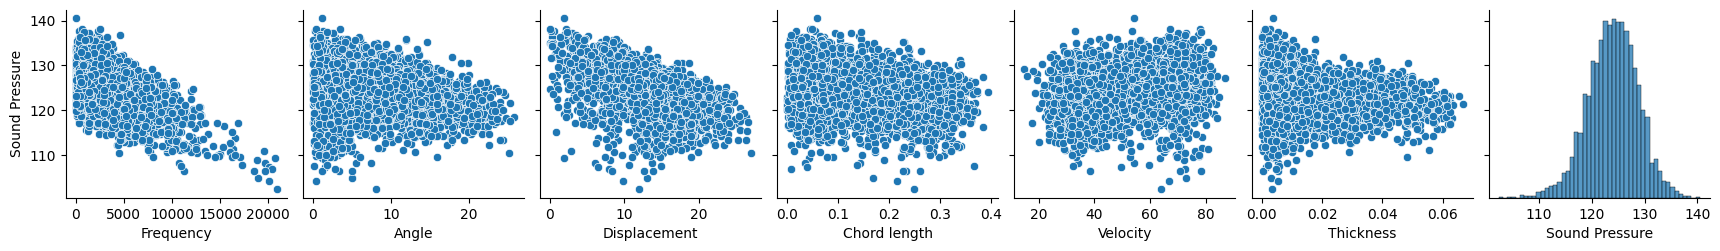

In [7]:
sns.pairplot(data=df, y_vars=["Sound Pressure"])

It makes sense to use linear models as there does not seem to be extreme non-linear behaviour.

##### Convert the data to matrix/vector form.

For a given row of data $\mathbf{x_i}=(x_{i1}, \dots, x_{i6})$, label the data so $x_{i1}$ corresponds to frequency, $x_{i2}$ corresponds to angle etc. 

In [8]:
X_df = df.drop(columns="Sound Pressure")    # Save a copy of the dataframe without column "Sound Pressure"

In [9]:
def convert_df_to_matrix(df):
    """
    Converts a dataframe representing the airfoil dataset to matrix form.

    Parameters:
    -----------
    df : DataFrame representing the airfoil dataset, of shape (N, p + 1)

    Returns:
    --------
    X_data : A matrix of predictors, of shape (N, p)
    y_train: A vector corresponding to the column "Sound Pressure", of shape (N,)
    """

    X_df = df.drop(columns="Sound Pressure")    # Save a copy of the dataframe without column "Sound Pressure"
    X_data = X_df.to_numpy()                    # Save X_df as a matrix
    y = df["Sound Pressure"].to_numpy()         # Save the target variable "Sound Pressure" as a vector
    return X_data, y


def append_one_col(X):
    """
    Inserts a column of ones to the left of the given matrix.

    Parameters:
    -----------
    X : A n x p matrix

    Returns:
    --------
    X_new : A n x (p + 1) matrix whose first column consists of ones and the remaining
    columns are equal to those in X
    """
    
    n = X.shape[0]                              # Get number of rows of X
    one_vec = np.ones(shape=(n,1))              # n-vector of ones
    X_new = np.append(one_vec, X, axis=1)       # Insert the vector of ones to the left of X_data to get X as defined above
    return X_new

In [10]:
X_train_data, y_train= convert_df_to_matrix(df)    # X_train_data is the data matrix, y is the vector for "Sound Pressure"
X_train = append_one_col(X_train_data)             # Inserts a column of ones to the left of X_train_data

#### 1.1 Linear regression (8 marks)  

1.1.1

## Mathematical formulation and deriving the solution

In this task, we are asked to find a linear model

$$
f_{\beta_0, \dots, \beta_6}:\mathbb{R}^6 \to \mathbb{R}
$$

$$
f_{\beta_0, \dots, \beta_6}(x_1, x_2,\dots, x_6) = \beta_0 + \beta_1 x_1 + \dots + \beta_6 x_6 \qquad \beta_i\in \mathbb{R}
$$

which minimises the *empirical risk*

$$
\frac{1}{N} \sum_{i=1}^{N} (y_i-\beta_0-\sum_{j=1}^6x_{ij} \beta_j)^2
$$
<!-- 
where our data is $(\mathbf{x_1},y_1), \dots, (\mathbf{x_N},y_N)$ and each $\mathbf{x_i}=(x_{i1},\dots, x_{i6})$. -->


Using the notation
$$
	  X = 
	  \begin{bmatrix}
	  	1      & x_{11} & \dots  & x_{16} \\
	  	\vdots & \vdots & \ddots & \vdots \\
	  	1      & x_{N1} & \dots  & x_{N6}
	  \end{bmatrix}, \qquad
   	  \beta = 
   	  \begin{bmatrix}
  	  	\beta_0 \\
  	  	\beta_1 \\
  	  	\vdots \\
  	  	\beta_6
  	  \end{bmatrix}, \qquad
   	  \mathbf{y} = 
   	  \begin{bmatrix}
  	  	y_1 \\
  	  	y_2 \\
  	  	\vdots \\
  	  	y_N
  	  \end{bmatrix}
$$

We can rewrite the problem as

$$
\text{arg min}_{\beta} ||\mathbf{y} - X \beta||_2^2
$$

The derivation for the minimum is given in the notes
<!-- This can be solved by *projecting $y$ onto the column span of $X$*. By noting that 

$$
\mathbb{R}^N= \text{Col(X)} \oplus \text{Col(X)}^\perp
$$

where $\text{Col(X)}$ is the column space of $X$, $\oplus$ is the direct sum, and $\perp$ is the orthogonal complement, we can write 

$$
\mathbf{y} = \mathbf{y}_x + \mathbf{y}_{x^\perp}
$$

where $\mathbf{y}_x \in \text{Col(X)}$ is the projection of $y$ onto $\text{Col(X)}$ and $X^T \cdot \mathbf{y}_{x^\perp}=0$. It is an elementary result in linear algebra that $\mathbf{y}_x$ is the *unique* vector in $\text{Col(X)}$ which minimises the distance to $\mathbf{y}$. Hence, we know that the minimiser $\beta_{min}$ satisfies 

$$
X\beta_{min} = \mathbf{y}_x
$$

By noting that

$$
X^T X\beta_{min} = X^T \mathbf{y}_x = X^T (\mathbf{y}_x + \mathbf{y}_{x^\perp}) = X^T \mathbf{y} 
$$
If $X^T X$ is invertible, then  -->

$$
\beta_{min} = (X^TX)^{-1}X^T \mathbf{y} 
$$

<br>
<br>
<br>
<br>


## Find parameters for ordinary least squares

In [11]:
def ordinary_least_squares_params(X, y):
    """
    Computes the estimates for parameters under the ordinary least squares model.

    Parameters:
    -----------
    X : Matrix of predictors, of shape (N, p + 1)
    y : Vector of target variable, of shape (N,)

    Returns:
    --------
    b : Vector of estimated parameters given by (X^T X)^-1 X^T y, of shape (p+1,)
    """
    
    X_t = np.transpose(X)                       # Saves X^T
    return np.linalg.inv(X_t @ X) @ X_t @ y     # Return (X^T X)^-1 X^T y. @ denotes matrix multiplication. np.linalg.inv(A) returns the inverse of A.

In [12]:
ols_estimated_params = ordinary_least_squares_params(X_train, y_train)      # Estimate the paramters from the data

def get_label(i):
    """
    Helper function for printing parameters.
    """
    if i == 0:
        return "intercept"
    else:
        return df.columns[i - 1]

for i in range(len(ols_estimated_params)):
    print(f"The estimate for beta_{i}, {get_label(i)}, is {np.round(ols_estimated_params[i], 5)}")    # Print the estimates, rounded to 5 dp

The estimate for beta_0, intercept, is 132.5999
The estimate for beta_1, Frequency, is -0.00129
The estimate for beta_2, Angle, is 0.14989
The estimate for beta_3, Displacement, is -0.83716
The estimate for beta_4, Chord length, is -0.84876
The estimate for beta_5, Velocity, is 0.10495
The estimate for beta_6, Thickness, is -0.97077


<br>

The interpretation is that other things being constant, one unit of increase in Angle from the mean will give an approximate increase of roughly 0.15 units in sound pressure. What if we also want to compare their relative importance? Then we would need to **rescale the parameters by the standard deviation of the data** so they have the same scale.

<br>
<br>


In [13]:
# sd of each column
sd_arr = X_train_data.std(axis=0)

# scale
standardised_ols_params = ols_estimated_params[1:] * sd_arr

# add intercept in front
standardised_ols_params = np.insert(standardised_ols_params, 0, ols_estimated_params[0])

for i in range(len(standardised_ols_params)):
    print(f"The estimate for standardised beta_{i}, {get_label(i)}, is {np.round(standardised_ols_params[i], 5)}")    # Print the estimates, rounded to 5 dp

The estimate for standardised beta_0, intercept, is 132.5999
The estimate for standardised beta_1, Frequency, is -3.5755
The estimate for standardised beta_2, Angle, is 0.83448
The estimate for standardised beta_3, Displacement, is -3.92865
The estimate for standardised beta_4, Chord length, is -0.07833
The estimate for standardised beta_5, Velocity, is 1.72496
The estimate for standardised beta_6, Thickness, is -0.01356


<br>
We can see that among all the factors, it seems like Frequency and Displacement are most significant while Thickness and Chord length are least so.

<br>
<br>

<Figure size 800x600 with 0 Axes>

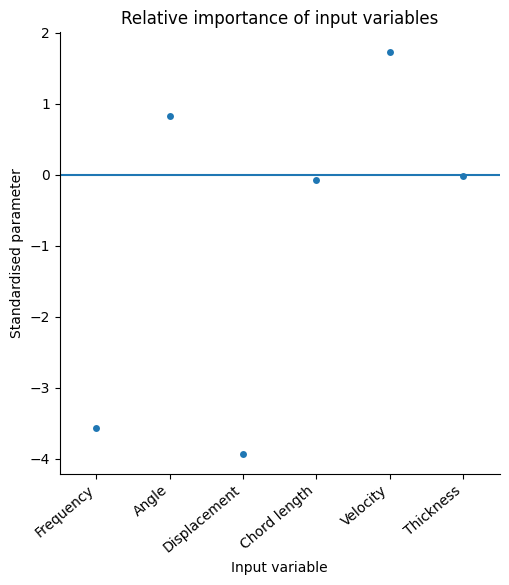

In [14]:
def make_plot():
    plt.figure(figsize=(8,6))
    labels = df.columns[:-1]
    ax = sns.catplot(y=standardised_ols_params[1:], x=labels)
    ax.set_xticklabels(rotation=40, ha="right")
    plt.axhline(0)
    plt.ylabel("Standardised parameter")
    plt.xlabel("Input variable")
    plt.title("Relative importance of input variables")
make_plot()

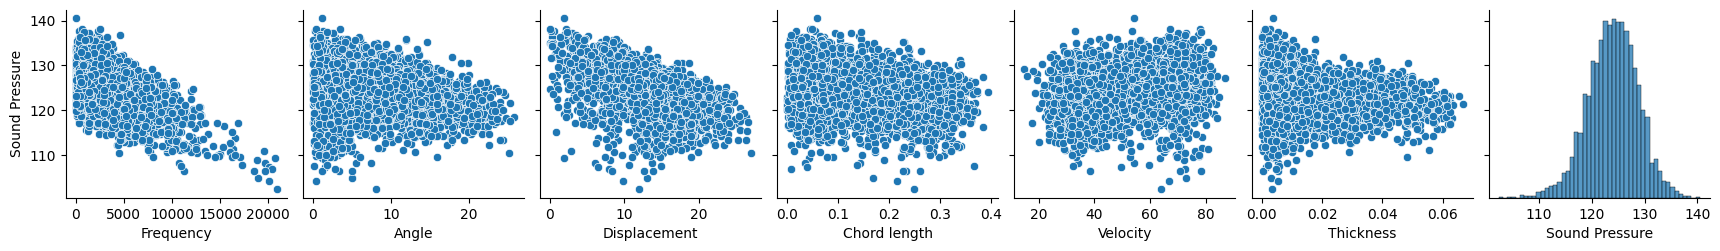

In [15]:
sns.pairplot(data=df, y_vars=["Sound Pressure"])

Our conclusions seem to match the trend seen in the plots.

## In-sample MSE

Recall that these parameters give us the function minimising the *empirical risk*. We can now compute its in-sample MSE 
$$
\frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 = \frac{1}{N} ||\mathbf{y} - X \hat{\beta}||_2^2
$$
where the $\hat{\beta} = (\hat{\beta}_0, \dots, \hat{\beta}_6)$ are the estimates found above and $\hat{y}_i=f_{\hat{\beta}_0,\dots, \hat{\beta}_6}(\mathbf{x_i})$ is the predicted value

In [16]:
def get_MSE(y, y_pred):
    """
    Computes the MSE.
    
    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    y_pred : Vector of predicted values, of shape (N,)

    Outputs:
    --------
    (float) : The MSE
    """
    
    N = len(y)                          # Number of observations
    return sum((y - y_pred)**2) / N     # (y - y_pred)**2 is a vector with entry i = (y_i - y_hat_i)**2



def ols_pred(X, beta):
    """
    Computes predictions using X and beta

    Parameters:
    -----------
    X : Matrix of predictors, of shape (N, p + 1)
    beta : Vector of parameters, of shape (p + 1,)

    Output:
    -------
    y_hat : Vector of predicted values, of shape (N,)
    """

    # Recall that for each row vector of observations x,
    # the prediction is given by x @ beta.
    # Pack this operation into a matrix to get the desired form
    return X @ beta     

In [17]:
ols_predicted = ols_pred(X_train, ols_estimated_params)   # Get predicted values
train_MSE = get_MSE(y_train, ols_predicted)               # Get MSE

print(f"In-sample MSE for ordinary least squares is {np.round(train_MSE, 3)}.")    # Print rounded MSE

In-sample MSE for ordinary least squares is 1.876.


<br>

We can interpret this value as the **average squared prediction error** for an input sampled randomly from the **training dataset**. Generally speaking, the lower the value, the better our model is at predicting data *which is drawn from the training dataset*. That said, this may not generalise to new data, since a model with low in-sample MSE may have high generalisation error.

<br>

## In sample R2

Next, we compute the in-sample $R^2$ score

$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}= 1-\frac{SS_{res}}{SS_{tot}}
$$

where $1_N$ is a vector of length $N$ with all entries $1$. 

In [18]:
def get_R2(y, y_pred):
    """
    Computes R^2.
    
    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    y_pred : Vector of predicted values, of shape (N,)

    Outputs:
    --------
    (float) : R^2
    """

    SS_res = sum((y - y_pred)**2)                   # Residual sum of squares
    SS_tot = sum((y - np.mean(y))**2)               # Total sum of squares
    return 1 - SS_res / SS_tot

In [19]:
train_R2 = get_R2(y_train, ols_predicted)                 # Get in-sample R^2
print(f"In-sample R^2 score for ordinary least squares is {train_R2}.")   # Print in-sample R^2

In-sample R^2 score for ordinary least squares is 0.9177343977263076.


<br>

We can interpret this as the proportion of variance *in the training data* explained. The higher the score, the higher the proportion explained. 

<br>

1.1.2

## Load and inspect test data

In [20]:
df_test = pd.read_csv("airfoil_noise_test.csv")     # Save data to dataframe
df_test.describe()      # Inspect data summary

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,2899.010272,8.168879,13.457254,0.137074,50.775639,0.014163,123.968845
std,2678.943633,5.606230,4.551486,0.093508,15.940928,0.014034,4.654713
min,25.769177,0.011299,0.082166,0.000848,21.139451,0.000002,107.996004
25%,1076.460339,3.618578,10.562385,0.054891,36.987297,0.004148,121.106574
50%,2005.178515,7.249896,13.971662,0.122195,47.345385,0.008715,124.126098
75%,3842.996299,11.799025,16.506753,0.208549,66.755918,0.019872,127.207364
max,19744.221140,26.623922,26.393545,0.360646,84.766450,0.068163,136.422496


In [21]:
df_test.dtypes      # Inspect data types of data

Frequency         float64
Angle             float64
Displacement      float64
Chord length      float64
Velocity          float64
Thickness         float64
Sound Pressure    float64
dtype: object

Looks right, so we convert to matrices and get the prediction

In [22]:
X_test_data, y_test = convert_df_to_matrix(df_test)  # X_test_data is the data matrix, y is the vector for "Sound Pressure"
X_test = append_one_col(X_test_data)                    # Add column of ones to X_test_data

ols_y_test_pred = ols_pred(X_test, ols_estimated_params)      # Make prediction on test data 
                                                              # using parameters from training data

## Compute the R^2 score and MSE for test data

In [23]:
test_MSE = get_MSE(y_test, ols_y_test_pred)     # Get test MSE
test_R2 = get_R2(y_test, ols_y_test_pred)       # Get test R2
print(f"Out-of-sample MSE is {test_MSE}")       # Print test MSE
print(f"Out-of-sample R^2 score is {test_R2}")  # Print test R2

Out-of-sample MSE is 1.984389577119038
Out-of-sample R^2 score is 0.9083172459581677


In [24]:
print(f"Out-of-sample MSE - In-sample MSE is {test_MSE - train_MSE}")         # Print test MSE - train MSE
print(f"Out-of-sample R^2 score - In-sample R^2 is {test_R2 - train_R2}")     # Print test R2 - train R2

Out-of-sample MSE - In-sample MSE is 0.10883293747883438
Out-of-sample R^2 score - In-sample R^2 is -0.009417151768139953


<br>

We can see that the out-of-sample MSE is higher than that of the in-sample and out-of-sample R2 score is lower than that of the in-sample.

The goal of statistical learning is to minimise the expected loss from the **true distribution of the data**. Since we do not know the true distribution, what we have done above is approximate this expected loss with the empirical loss. However, this approximation not accurate and may lead to a relatively poorer performance when we generalise our model to unseen data, which is what we observe here.

This phenomenon is known as overfitting.

<br>

#### 1.2 Lasso regression (12 marks) 

1.2.1

##### Motivating standardisation of data in Lasso

Lasso performs regularisation by penalising the $L_1$ norm of non-intercept coefficients in $\beta$. This is done because appropriate *shrinkage* can decrease the variance of the estimator at the cost of introducing some biasedness. Lasso can also shrink some estimators to zero, hence allowing the model to be more *interpretable*.

<br>

In Tibshirani 1996, it is assumed that the data is standardised so that $\frac{\sum_i x_{ij}}{N}=0$, $\frac{\sum_i x_{ij}^2}{N}=1$ and $\frac{\sum_i y_{i}}{N}=0$. Without losing generality, we will also assume $\frac{\sum_i y_{ij}^2}{N}=1$. Hence, we will standardise our data to meet the above criteria.

<br>

In this section, we will give a brief motivation for this.

To be consistent with the literature, we will change our notation so
$$
	  X = 
	  \begin{bmatrix}
	  	 x_{11} & \dots  & x_{16} \\
	  	 \vdots & \ddots & \vdots \\
	  	 x_{N1} & \dots  & x_{N6}
	  \end{bmatrix}, \qquad
   	  \beta = 
   	  \begin{bmatrix}
  	  	\beta_1 \\
  	  	\vdots \\
  	  	\beta_6
  	  \end{bmatrix},	 \qquad
   	  \mathbf{y} = 
   	  \begin{bmatrix}
  	  	y_1 \\
  	  	y_2 \\
  	  	\vdots \\
  	  	y_N
  	  \end{bmatrix}
$$

The objective of Lasso is to solve

$$
\text{arg min}_{\beta,\beta_0} ||\mathbf{y} - \beta_0 - X \beta||_2^2 \quad \text{subject to } ||\beta||_1 \leq t
$$

<br>
<br>

By removing the mean, one can rewrite the problem as 

$$
\text{arg min}_{\beta} ||\mathbf{y} - X \beta||_2^2 \quad \text{subject to } ||\beta||_1 \leq t
$$

This is helpful as we can optimise one less variable, which saves computational cost.

<br>
<br>

**Note that $\beta_0$ corresponds to the mean of the distribution. We do not shrink $\beta_0$, since doing so would imply we believe that the mean should be small (in absolute value), but we have no reason to think so.**

**By ensuring $\frac{\sum_i x_{ij}^2}{N}=1$, we make the data have the same scale. If we do not do this, it would imply that the constraint $||\beta||_1 \leq t$ does not treat the $\beta_i$, $i\geq 1$ equally. In Bayesian terms, we would have different *priors* about the spread of the $\beta_i$.**

<br>
<br>
<br>
<br>
<br>
<br>


##### Using gradient descent

Assuming that the data has been standardised using the procedure stated above, one can show that the objective for Lasso can be rewritten as

$$
\text{arg min}_{\beta} \frac{1}{2N}||\mathbf{y} - X \beta||_2^2 + \lambda ||\beta||_1 \tag{1}
$$

We can try to apply gradient descent to this problem. 
<!-- Given a differentiable function $F:\mathbb{R}^d \to \mathbb{R}$, $F$ decreases fastest locally in the direction $-\nabla F$. Hence, if we define a sequence $(\mathbf{a_{n}})_{n\geq 1}$ iteratively and have each $\gamma_n$ sufficiently small,

$$
\mathbf{a_{n+1}} = \mathbf{a_{n}} - \gamma_n  \nabla F(\mathbf{a_{n}})
$$

then $F(\mathbf{a_{n}}) \geq F(\mathbf{a_{n+1}})$. If $F$ is convex, then local minima are global minima.

<br>
<br> -->

One can see that the loss function for Lasso is convex but the term $\lambda ||\beta||_1$ is not differentiable whenever any of the $\beta_i$ is 0. One can try to fix this by averaging the left and right derivatives and declaring the derivative at that point to be $0$.

The 'gradient' of the loss function is given below, noting that the gradient for $||\mathbf{y} - X \beta||_2^2$ is given in the notes



<!-- $$
\nabla_\beta \left( \frac{1}{2N}||\mathbf{y} - X \beta||_2^2 + \lambda ||\beta||_1 \right) = -\frac{(\mathbf{y} - X \beta)^T X}{N} + \lambda (sgn(\beta_1), \dots, sgn(\beta_6)) \tag{2}
$$ -->

$$
\nabla_\beta \left( \frac{1}{2N}||\mathbf{y} - X \beta||_2^2 + \lambda ||\beta||_1 \right) = -\frac{X^T  (y - X  \beta) }{N} + \lambda (sgn(\beta_1), \dots, sgn(\beta_6)) \tag{2}
$$

<br>
<br>
<br>
<br>
<br>
<br>


##### Motivating $K$-fold cross validation, hyper-parameter selection and shuffling data

To find the optimal hyper-parameter $\lambda$ for Lasso, we need to evaluate the performances of the different models obtained by varying $\lambda$. To do this, we need to use *$K$-fold cross validation* to estimate the performance of the model on *unseen data*. The procedure is given below:

1. We are given a partition $S_1, \dots, S_K$, which are of roughly equal size, of our training data $S$ and some $\lambda$.
2. Train a model $\hat{f}_{S_i^c, \lambda}$ on $S_i^c$ and compute an error measure 
over $S_i$. For example
$$
MSE_i = \sum_{x,y \in S_i} (\hat{f}_{S_i^c, \lambda}(x) - y)^2
$$
3. Repeat step 2 for $i=1, \dots, K$. Report the average error measure
$$
\langle MSE \rangle = \frac{1}{K} \sum_{i=1}^K \text{MSE}_i
$$
This value estimates how well the model predicts *unseen data*, since on each $i$, the model is trained on $S_i^c$ and tested on $S_i$, which it has never seen before. 

<br>



### Standardise and shuffle data

We shuffle data so that the different folds are symmetric, i.e. we do not want to see data of a certain type being concentrated in certain folds, which may occur if the data is ordered.

When standardising data, we note that *the validation data and test data* is standardised using the mean / standard deviation of the *respective training set*! This is because when we test data, we are not allowed to know the true mean and standard deviation of the test data.

In [25]:
# shuffle data

shuffle_indices = np.random.permutation(len(y_train))
X_train_data = X_train_data[shuffle_indices]
y_train = y_train[shuffle_indices]

In [26]:
def standardise(X_train, X_test):
    """
    Standardise the data by removing training
    mean and dividing by training standard deviation
    from X_train and X_test.

    Parameters:
    -----------
    X_train : Matrix, of shape (m, n)
    X_test : Matrix, of shape (a, n)

    Returns:
    --------
    X_train_std : Matrix, of shape (m, n)
    X_test_std : Matrix, of shape (a, n)
    """

    train_m = np.mean(X_train, axis=0)       # Computes means for each col
    train_sd = np.std(X_train, axis=0)       # Computes sd for each col
    X_train_std = (X_train - train_m) / train_sd
    X_test_std = (X_test - train_m) / train_sd
    return X_train_std, X_test_std


X_train_full_standardised, X_test_full_standardised = standardise(X_train_data, X_test_data)
y_train_full_standardised, y_test_full_standardised = standardise(y_train, y_test)

In [27]:
# Get estimate for lambda = 0, which is just ordinary least squares
# Used for initial position in gradient descent

ols_standardised_params = ordinary_least_squares_params(X_train_full_standardised, y_train_full_standardised)

##### Implement Lasso loss function and gradient descent

Picking a stopping criterion for GD

Usually, gradient descent methods stop when the norm of the gradient is smaller than some threshold. This makes sense, because at a local minimum, the gradient is zero. Assuming that the gradient is continuous, small gradient *might* hint that we are near the minimum.


However, this method *fails* in our case. This is because our "gradient" is *discontinuous* due to $\lambda ||\beta||_1$. So, it is not sensible to expect the gradient to converge to 0, even if the $\beta$ is close to the minimum.


To fix this, I decided to stop the algorithm to stop after a the *standard deviation* of a collection of values of the loss function found are smaller than some threshold. This criterion means that, even if we continued the algorithm, we are unlikely to see a large improvement.


## Implementing loss function of Lasso, its gradient and gradient descent

In [28]:
def lasso_loss(y, X, beta, t):
    """
    Evaluates loss function for Lasso

    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    X : Matrix of predictors, of shape (N, p)
    beta : Vector of parameters, of shape (p,)
    t : Float representing hyperparameter

    Returns:
    --------
    (float) : Evaluated value of loss function 
    
    """
    
    N = X.shape[0]      # Get row count of X
    return sum((y - X @ beta)**2) / (2 * N) + t * sum(abs(beta))    # Apply equation (1)


def grad_lasso_loss(y, X, beta, t):
    """
    Evaluates gradient of loss function

    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    X : Matrix of predictors, of shape (N, p)
    beta : Vector of parameters, of shape (p,)
    t : Float representing hyperparameter

    Returns:
    --------
    (array), of shape (p,)
    """

    N = X.shape[0]      # Get row count of X
    X_T = np.transpose(X)
    term_1= - X_T @ (y - X @ beta) / N  # First term of equation 2
    term_2 = t * np.sign(beta)          # Second term of equation 2. np.sign returns vector after
                                        # applying element-wise sgn function
    return term_1 + term_2


def gradient_descent(f, df, x0, initial_step_size=1, tol=4e-5,  tol_len=200, burnin=400, max_its=1000000):
    """
    Finds the minimiser of a given function f using gradient descent.
    Stops when the standard deviation of a collection of values of f is at most tol.

    Paramters:
    ----------
    f : Function to be minimised, of the form f(x) -> float,
        where x is an array with shape (n,)
    df : Gradient of f, of the form df(x) -> array, shape (n,)
         where x is an array with shape (n,)
    x0 : Initial guess, of shape (n,)
    initial_step_size : float
    tol : Stop if standard deviation of f values is at most tol, float
    tol_len : Indicates the frequency with which the stopping condition is checked, int
    burnin : minimal number of iterations, int
    max_its : maximal number of iterations, int
    

    Returns:
    --------
    array of shape (n,)
    """
    
    # Initialise iteration count, position and 
    # history of f(x)
    iteration = 0
    x = x0
    hist = []

    while True:
        # Prevent program from running for too long.
        # Normally this should not be called
        if iteration > max_its:
            print(f"{max_its} iterations reached")
            return x

        iteration += 1                                # Increment iteration count
        step = df(x) * initial_step_size / iteration  # Compute step size
        x = x - step                                  # Find new position

        # After burnin iterations, save the value of f once
        # every 100 iterations
        if iteration % 100 == 0 and iteration > burnin:
            hist.append(f(x))
            # print(f"iteration: {iteration}; value: {f(x)}")                     

        # Check if values found across different iterations are similar
        if iteration % tol_len == 0 and iteration > burnin:
            if np.std(hist) < tol:
                break

            # Reset history
            hist = []
    return x
    

## Model base class

In [29]:
class Model:
    """
    Base class for models

    Attributes:
    -----------
    hparams : hyperparamters
    """
    def __init__(self, hparams):
        self.hparams = hparams
    
    def train_model(self, X_train, y_train):
        """
        Train the model. The obtained parameters
        are saved as attributes
        """
        pass

    def predict(self, X_input):
        """
        Make predictions
        """
        pass
    
    def evaluate_model(self, y_true, X_in, metric=None):
        """
        Evaluate the model using some metric.
        """
        pass

## Linear model base class

Lasso and Elastic net are linear models.

This class can 

        1. Train a model
        2. Make predictions
        3. Evaluate the model
It stores the hyperparameter as an attribute

In [30]:
class LinearModel(Model):
    """
    Base class for linear models.

    Attributes:
    -----------
    hparams
    loss_func
    grad_loss_func
    """
    loss_func = None
    grad_loss_func = None
    
    def train_model(self, X_train, y_train):
        """
        Train linear model using gradient descent.
        """

        # wrap loss / functions so they only take one input
        # staticmethod prevents python from thinking that the functions
        # take self as argument
        loss_wrapper = staticmethod(lambda b : self.loss_func(y_train, X_train, b, self.hparams))
        grad_wrapper = staticmethod(lambda b : self.grad_loss_func(y_train, X_train, b, self.hparams))

        # save the parameters obtained
        self.beta = gradient_descent(loss_wrapper, grad_wrapper, ols_standardised_params)
    
    
    def predict(self, X_input):
        """
        Make predictions
        """
        return X_input @ self.beta

    def evaluate_model(self, y_true, X_input, metric='mse'):
        """
        Evaluate model using mse or R2

        Parameters:
        -----------
        y_true : true outcomes
        X_input : Inputs for prediction
        """

        # make prediction
        predicted = self.predict(X_input)

        # get evaluation metric
        if metric == 'mse':
            return get_MSE(y_true, predicted)
        
        if metric in {'R2', 'r2'}:
            return get_R2(y_true, predicted)

## Lasso Base class

In [31]:
class Lasso(LinearModel):
    # Put loss functions into Linear model class
    loss_func, grad_loss_func = staticmethod(lasso_loss), staticmethod(grad_lasso_loss)

## K-fold cross validation

In [32]:
def get_splits(X, k):
    """
    Split X into k pairs of train and validation sets.
    Output is of the form
    ((train_1, val_1), ..., (train_k, val_k))

    Parameters:
    -----------
    X : Matrix of shape (m, n)
    k : Number of parts to split into, int

    Returns:
    --------
    train_out : Array, of length k, of train sets
    val_out : Array, of length k, of val sets
    """
    train_out = []
    val_out = []
    m = X.shape[0]      # Row count of X

    # Split [0, 1, ..., m] into k arrays of roughly 
    # equal size. These are the indices of each part of X.
    fold_indices = np.array_split(np.arange(m), k)


    def train_val_split(X, indices):
        """
        Split X into train and validation set. 
        X_val is the element of X indexed by indices;
        X_train is its complement
        """

        X_val = X[indices]
        m = X.shape[0]

        mask = np.ones(m, dtype=bool)
        mask[indices] = False       
        X_train = X[mask, ...]

        return X_train, X_val

    # On ith iteration, append (train_i, val_i) to output
    for indices in fold_indices:
        train, val = train_val_split(X, indices)
        train_out.append(train)
        val_out.append(val)
    
    return train_out, val_out

In [33]:
# Split data into training and validation

X_trains_split, X_vals_split  = get_splits(X_train_data, 5)
y_trains_split, y_vals_split = get_splits(y_train, 5)

X_trains_split, X_vals_split = zip(*[standardise(t_v_tup[0], t_v_tup[1]) for t_v_tup in zip(X_trains_split, X_vals_split)])
y_trains_split, y_vals_split = zip(*[standardise(*t_v_tup) for t_v_tup in zip(y_trains_split, y_vals_split)])

#### Object for cross validation

This class is used to select the optimal hyperparameter

In [34]:
class CrossValidation:
    """
    Class responsible for cross validation and hyperparameter selection.

    Attributes:
    -----------
    k : Number of folds, int
    X_trains : Array, of length k, of input train sets
    X_vals : Array, of length k, of input validation sets
    y_trains : Array, of length k, of output train sets
    y_vals : Array, of length k, of output validation sets
    model : Type of statistical model
    """
    def __init__(self, X_trains, X_vals, y_trains, y_vals, model:Type[Model]) -> None:
        self.k = len(X_vals)
        self.X_trains = X_trains
        self.X_vals = X_vals
        self.y_trains = y_trains
        self.y_vals = y_vals
        self.model = model
        
    def cv_loss(self, hparams, metric):
        """
        Evaluate the average accuracy across different folds
        of the trained model with hyperparameter hparams under
        some metric 
        """

        models = []
        # Train a model for each training fold
        for cur_X_train, cur_y_train in zip(self.X_trains, self.y_trains):
            cur_model = self.model(hparams)
            cur_model.train_model(cur_X_train, cur_y_train)
            models.append(cur_model)

        loss_arr = []

        # Find the loss on validation set for each fold, using model found above
        cur_model : Model
        for cur_X_val, cur_y_val, cur_model in zip(self.X_vals, self.y_vals, models):
            loss_arr.append(cur_model.evaluate_model(cur_y_val, cur_X_val, metric))
        
        loss_arr = np.array(loss_arr)

        # Return mean of MSE
        return loss_arr.mean()


class CrossValidationRegression(CrossValidation):
    """
    Cross validation for regression tasks
    """
    def cv_loss(self, hparams):
        """ 
        Evaludate model across different folds using mse
        """
        return super().cv_loss(hparams, 'mse')


class CrossValidationLasso(CrossValidationRegression):
    def __init__(self, X_trains, X_vals, y_trains, y_vals) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, Lasso)

    # make plot for average MSE against hyperparameter
    def hyper_parameter_array_search(self, hparams, y_low=0.0824, y_high=0.0827, plot=True):

        mse_arr = []
        for h in hparams:
            mse_arr.append(self.cv_loss(h))
        
        optimal_hparam = hparams[min(range(len(hparams)), key=mse_arr.__getitem__)]

        if plot:
            plt.figure(figsize=(8, 6))
            plt.title("Average MSE (standardised) against hyperparameter")
            plt.ylabel("Average MSE (standardised)")
            plt.xlabel(r"$\lambda$")
            plt.plot(hparams, mse_arr)
            plt.ylim(y_low, y_high)
            plt.axvline(optimal_hparam, color='green', linestyle='--', label=r"Optimal $\lambda$")
            plt.legend()
            plt.locator_params(axis='y', nbins=4)
            plt.locator_params(axis='x', nbins=5)
        print(f"Optimal hyperparameter: {optimal_hparam}")

## Search for optimal hyperparameter

We find the average MSE for different values of $\lambda$ and plot them below. Remember we aim to find the $\lambda$ which minimises the average MSE over all folds, since this suggests how well the model will perform on unseen data.

Optimal hyperparameter: 0.001


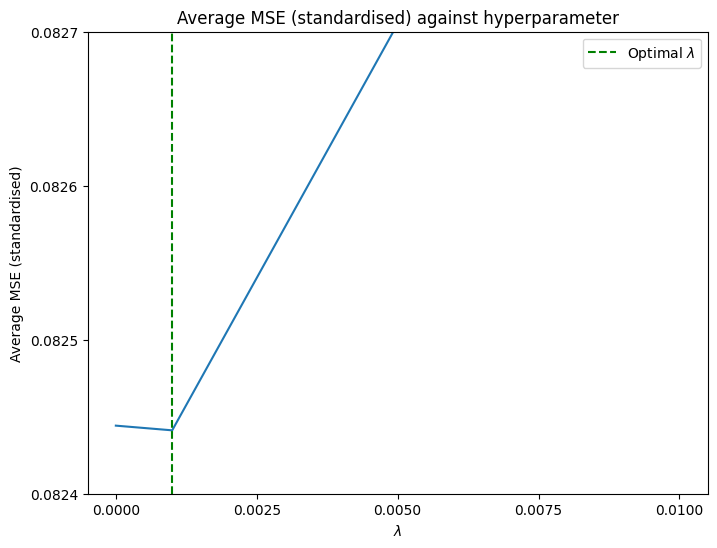

In [35]:
CrossValidationLasso(X_trains_split, X_vals_split, y_trains_split, y_vals_split).hyper_parameter_array_search([0, 0.001, 0.01])

Optimal hyperparameter: 0.0006


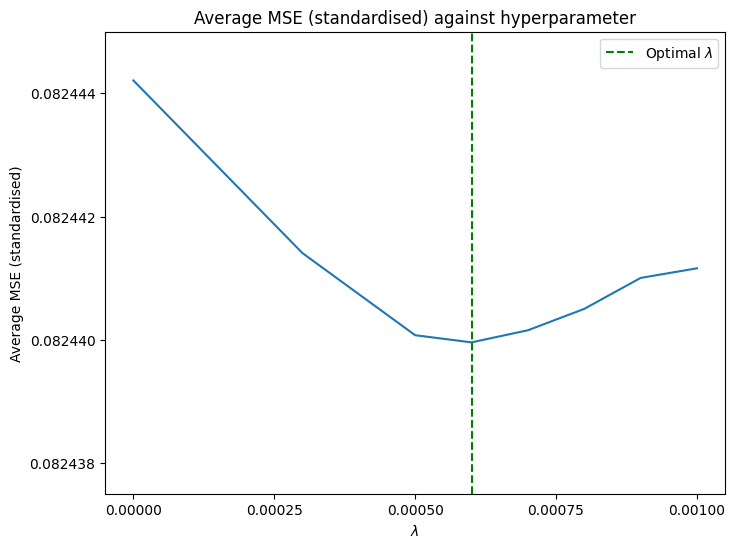

In [36]:
CrossValidationLasso(X_trains_split, X_vals_split, y_trains_split, y_vals_split).hyper_parameter_array_search([0, 0.0003, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,0.001], y_low=0.0824375, y_high=0.082445)

Optimal hyperparameter: 0.0005368421052631578


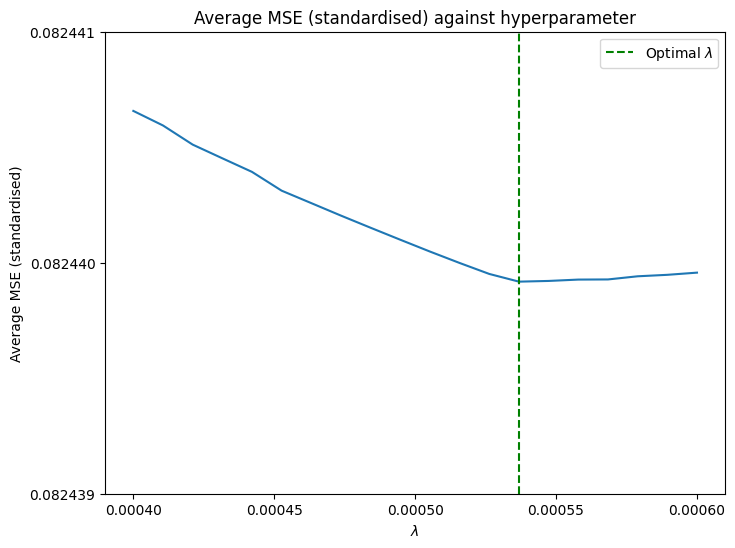

In [37]:
CrossValidationLasso(X_trains_split, X_vals_split, y_trains_split, y_vals_split).hyper_parameter_array_search(np.linspace(0.0004, 0.0006, 20), plot=True, y_low=0.082439, y_high=0.082441)

## Optimal hyperparameter

The value found is 

$$\lambda=0.0005368421052631578$$

Note: Recall that we have standardised the magnitude of $y$. Had we not done so, the optimal parameter would be different. 

1.2.2

We now visualise how $\beta$ changes as we vary $\lambda$

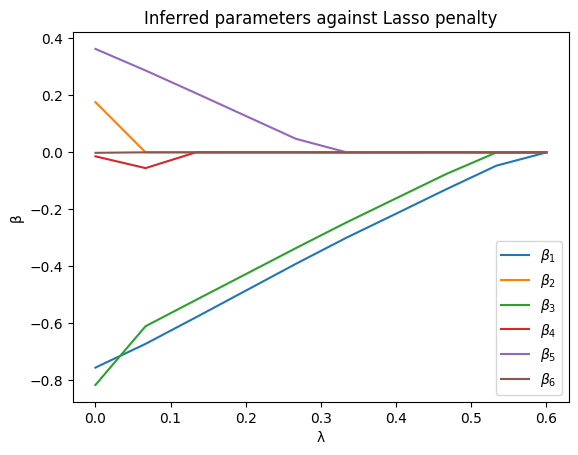

In [38]:
# Plots lasso parameters against hyperparameter
def lasso_param_hparam_plot(X, y, hparam_arr):
    param_count = X.shape[1]
    param_grid = np.empty(shape=(0, param_count))
    
    for hparam in hparam_arr:
        # Train a model
        cur_model = Lasso(hparam)
        cur_model.train_model(X, y)

        param_grid = np.r_[param_grid, [cur_model.beta]]
    
    for i in range(param_count):
        col = param_grid[:, i]
        plt.plot(hparam_arr, col, label=fr"$\beta_{i + 1}$")
    plt.title("Inferred parameters against Lasso penalty")
    plt.xlabel("λ")
    plt.ylabel("β")
    plt.legend()
    plt.show()

lasso_param_hparam_plot(X_trains_split[0], y_trains_split[0], np.linspace(0, 0.6, 10))

We notice a few things in the plot

     1. The trends look piecewise linear. Generally, on each piece, the coefficients seem to be shrunk by a constant amount.

     2. Some coefficients are shrunk to zero. This allows Lasso to perform variable selection. We can remove input variables with
     zero parameter. This makes our model more interpretable
     
     3. Remarkably, the red line actually grew larger in magnitude at first. This may be because Lasso tries to 'compensate' for
     other parameters which it is shrinking


## Why shrink parameters?

#### Bias variance tradeoff

The answer lies partly in the bias-variance tradeoff. Assuming that the data is given by the true relation

$$
y = f(x) + \epsilon \qquad \text{with } E(\epsilon)=0 \text{, } Var(\epsilon)=\sigma^2
$$

and given some sample data $D$, we approximate $f$ by $\hat{f}$. Let $x$ be an unseen data. Then

$$
E_{D, \epsilon}\left[\left(y-\hat{f}(x)\right)^2\right] = Bias^2 + Var_D(\hat{f}(x)) + \sigma^2
$$
where $Bias = E_D\left(\hat{f}(x)-f(x)\right)$

We aim to minimise the term on the left. Since $\sigma$ is fixed, we can minimise the bias and variance.

However, Gauss–Markov theorem says that the ordinary least squares (OLS) estimator has the lowest sampling variance within the class of linear unbiased estimators, under certain assumptions. If we want to have an lower expected prediction error than the estimator, we will need to look at biased estimators. Through penalising non-zero parameters, Lasso tries to lower the variance by introducing some bias. This can be achieved if the increase in $Bias^2$ is smaller than the decrease of  $Var_D(\hat{f}(x))$.

#### Parameter selection
Suppose we suspect that some of the predictors are actually irrelevant to the predicted variable. We would then want to only consider the relevant ones, since a model with fewer parameters would generally have less variance. They are also more interpretable. Possible methods of selecting relevant variables include forward selection and best subsets, but these two have their own flaws. Lasso is another alternative for doing so.  

1.2.3

## Training with optimal hyperparameter

#### In-sample performance

First we train the model 

In [39]:
optimal_lambda = 0.0005368421052631578

# Train lasso on standardised train set
insample_lasso = Lasso(optimal_lambda)
insample_lasso.train_model(X_train_full_standardised, y_train_full_standardised)

Recall that we have standardised the data. We want to recover the parameters for the original model by noting that our previous model was
$$
\frac{y-\bar{y}_{train}}{\sigma_y} = \epsilon + \sum_{i=1}^6 \frac{x_i-\bar{x}_{train,i}}{\sigma_{x_i}} \beta_i
$$

In [40]:
def unstandardise(beta_std, X_train, y_train):
    """
    Unstandardise the beta obtained after the X and y values are
    standardised
    """

    # Array of std for columns of x
    x_std_arr = X_train.std(axis=0)
    sig_y = y_train.std() 
    beta = beta_std * sig_y/ x_std_arr

    # Compute component of y in intercept
    intercept = y_train.mean()
    # Compute x component in intercept
    intercept -= (X_train.mean(axis=0) / x_std_arr) @ beta_std * sig_y

    # Add intercept to parameter vector
    return np.append([intercept], beta)

lasso_unstandardise_full_train = unstandardise(insample_lasso.beta, X_train_data, y_train)

In-sample MSE and $R^2$

In [41]:
lasso_insample_prediction = X_train_data @ lasso_unstandardise_full_train[1:] + lasso_unstandardise_full_train[0]
lasso_insample_mse = get_MSE(y_train, lasso_insample_prediction)
lasso_insample_r2 = get_R2(y_train, lasso_insample_prediction)

print(f"In-sample MSE for Lasso with optimal hyperparameter is : {lasso_insample_mse}")
print(f"In-sample R^2 score for Lasso with optimal hyperparameter is : {lasso_insample_r2}")

In-sample MSE for Lasso with optimal hyperparameter is : 1.8756096402781681
In-sample R^2 score for Lasso with optimal hyperparameter is : 0.9177320730141069


#### Out-of-sample performance

In [42]:
lasso_outsample_prediction = X_test_data @ lasso_unstandardise_full_train[1:] + lasso_unstandardise_full_train[0]

lasso_outsample_mse = get_MSE(y_test, lasso_outsample_prediction)
lasso_outsample_r2 = get_R2(y_test, lasso_outsample_prediction)
print(f"Out-of-sample MSE for Lasso with optimal hyperparameter is : {lasso_outsample_mse}")
print(f"Out-of-sample R^2 score for Lasso with optimal hyperparameter is : {lasso_outsample_r2}")

Out-of-sample MSE for Lasso with optimal hyperparameter is : 1.9835406206878816
Out-of-sample R^2 score for Lasso with optimal hyperparameter is : 0.9083564694375528


Again, we see that the out-of sample version has higher MSE and lower $R^2$. Note that the MSE here is given in different scale from the previous section (on OLS) due to scaling. 

## Comparison with OLS

#### MSE and $R^2$

|  | In-sample MSE | In-sample R^2 | Out-of-sample MSE | Out-of-sample R^2|
| --- | --- | --- | --- | --- |
| OLS|1.876  | 0.918 |1.984  |0.908  |
| Lasso | 1.876 | 0.918 | 1.984 | 0.908 |


There is not much difference between the performance of Lasso and OLS.

#### Comparing the parameters

We compare standardised values of the parameters for $\lambda=0$ and optimal $\lambda$

<Figure size 1200x900 with 0 Axes>

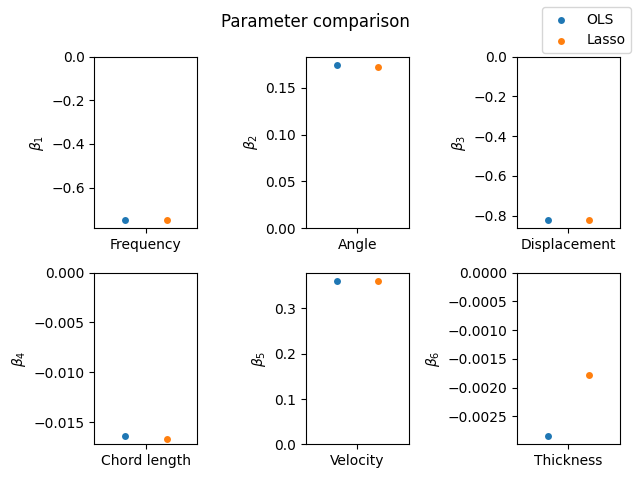

In [43]:
# This function plots the plot below
def lasso_ols_plot(ols, lasso):
    plt.figure(figsize=(12, 9))
    fig, axes = plt.subplots(2, 3)
    labels = df.columns[:-1]

    for i, ax in enumerate(axes.flatten()):
        temp_df = pd.DataFrame([[ols[i], 'OLS', labels[i]], [lasso[i], 'Lasso', labels[i]]], columns=[rf"$\beta_{i+1}$", "Model", "Input variable"])
        if ols[i] >= 0:
            y_lims = [0, ols[i] * 1.05]
        else:
            y_lims = [ols[i] * 1.05, 0]

        sns.stripplot(data=temp_df, y=rf"$\beta_{i+1}$", x="Input variable", ax=ax, jitter=False, hue="Model", dodge=True, legend=0).set_ylim(y_lims)
        ax.set(xlabel=None)

    fig.legend(temp_df["Model"])

    plt.suptitle("Parameter comparison")
    plt.tight_layout()
    plt.show()

lasso_ols_plot(ols_standardised_params, insample_lasso.beta)

We see that the smallest $\beta_i$, which corresponds to thickness, shrinks considerably. Others are more or less similar.

#### 1.3 Elastic Nets (20 marks) 
1.3.1

Define the loss function and its gradient. The function is given in the coursework. The gradient is

\begin{align*}
&\nabla_\beta 
\left(
     \frac{1}{2N}||\mathbf{y} - X \beta||_2^2 + 
\lambda 
\left 
[\alpha ||\beta||_1  + (1-\alpha) ||\beta||_2^2
\right]

\right)  \\

=& -\frac{X^T  (y - X  \beta) }{N} + \lambda \alpha (sgn(\beta_1), \dots, sgn(\beta_6)) \tag{2}
+ 2 \lambda (1-\alpha) \beta
\end{align*}


In [44]:
def elastic_net_loss(y, X, beta, hparams):
    """
    Evaluates loss function for elastic net

    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    X : Matrix of predictors, of shape (N, p)
    beta : Vector of parameters, of shape (p,)
    hparams : A tuple (t, a) of hyperparameters,
    where t is the strength of regularisation and a controls the
    relative importance of Ridge and Lasso terms

    Returns:
    --------
    (float) : Evaluated value of loss function 
    
    """


    t, a = hparams
    return lasso_loss(y, X, beta, t * a) + t * (1-a) * sum(beta**2)


def grad_elastic_net(y, X, beta, hparams):
    """
    Evaluates gradient of loss function

    Parameters:
    -----------
    y : Vector of observed values of target variable, of shape (N,)
    X : Matrix of predictors, of shape (N, p)
    beta : Vector of parameters, of shape (p,)
    hparams : A tuple (t, a) of hyperparameters,
    where t is the strength of regularisation and a controls the
    relative importance of Ridge and Lasso terms

    Returns:
    --------
    (float)
    """

    t, a = hparams
    return grad_lasso_loss(y, X, beta, t * a) + t * (1 - a) * 2 * beta

Pack the loss function into the model class and make the class for cross validation

In [45]:
class ElasticNet(LinearModel):
    loss_func = staticmethod(elastic_net_loss)
    grad_loss_func = staticmethod(grad_elastic_net)


class CrossValidationElasticNet(CrossValidationRegression):
    def __init__(self, X_trains, X_vals, y_trains, y_vals) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, ElasticNet)
    
    def hyper_parameter_2d_search(self, hparams, plot=True):

        mse_arr = []
        t_arr, a_arr = hparams
        hparam_tuples = [(t, a) for t in t_arr for a in a_arr]
        for h in hparam_tuples:
            mse_arr.append(self.cv_loss(h))
        
        if plot:
            t_len, a_len = len(t_arr), len(a_arr)
            mse_grid = np.reshape(mse_arr, (t_len, a_len))
            tt, aa = np.meshgrid(t_arr, a_arr)
            plt.pcolormesh(tt, aa, np.transpose(mse_grid))
            # plt.colorbar().formatter.set_powerlimits((-2, -2))
            plt.colorbar()
            plt.xlabel(r"$\lambda$")
            plt.ylabel(r"$\alpha$")
            plt.ticklabel_format(axis="x", scilimits=(-4, -4))
            
            plt.xticks(t_arr)
            plt.yticks(a_arr)
            plt.tight_layout()
                    
        return hparam_tuples[min(range(len(hparam_tuples)), key=mse_arr.__getitem__)]

    def hyper_parameter_array_search(self, lambdas, alpha, y_low=0.0824, y_high=0.0827, plot=True):
        hparams = [(l, alpha) for l in lambdas]
        mse_arr = []
        for h in hparams:
            mse_arr.append(self.cv_loss(h))
        optimal_hparam = lambdas[min(range(len(hparams)), key=mse_arr.__getitem__)]

        if plot:
            plt.figure(figsize=(8, 6))
            plt.title("Average MSE (standardised) against hyperparameter")
            plt.ylabel("Average MSE (standardised)")
            plt.xlabel(r"$\lambda$")
            plt.plot(lambdas, mse_arr)
            plt.ylim(y_low, y_high)
            plt.axvline(optimal_hparam, color='green', linestyle='--', label=r"Optimal $\lambda$")
            plt.legend()
            plt.locator_params(axis='y', nbins=4)
            plt.locator_params(axis='x', nbins=5)
        print(f"Optimal hyperparameter: {optimal_hparam}")

Try training it on $\lambda=0.0006$ and $\alpha=0.4$ to show that it works

In [46]:
EN_1 = ElasticNet((0.0006, 0.4))
EN_1.train_model(X_train_full_standardised, y_train_full_standardised)
en1_r2 = EN_1.evaluate_model(y_train_full_standardised, X_train_full_standardised, 'r2')
print(f"In-sample R2 score is {en1_r2}")

In-sample R2 score is 0.9177318107849964


1.3.2

### Finding optimal $\lambda$ for different $\alpha$

Initiallise the class with train / validation splits

In [47]:
CVEN = CrossValidationElasticNet(X_trains_split, X_vals_split, y_trains_split, y_vals_split)

$\alpha=0.1$

Optimal hyperparameter: 0.00011111111111111112


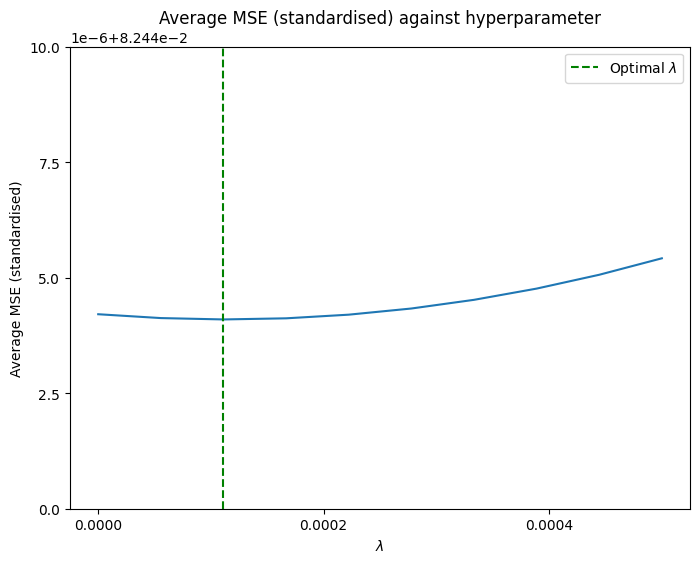

In [48]:
CVEN.hyper_parameter_array_search(np.linspace(0, 0.0005, 10), 0.1, y_low=0.08244, y_high=0.08245)

Out-of-sample MSE and $R^2$

We repeat the relation between standardised and unstandardised model below
$$
\frac{y-\bar{y}_{train}}{\sigma_y} = \epsilon + \sum_{i=1}^6 \frac{x_i-\bar{x}_{train,i}}{\sigma_{x_i}} \beta_i
$$

In [49]:
def ElasticNetOutSampleWrapper(hparams):
    """
    Evaluate out of sample performance of Elastic net.
    Unstandardises data before computing MSE
    """
    cven_1 = ElasticNet(hparams)

    # Train
    cven_1.train_model(X_train_full_standardised, y_train_full_standardised)


    # Unstandardised prediction.  Use formula above
    cven_out_pred1 = cven_1.predict(X_test_full_standardised) * y_train.std() + y_train.mean()

    enpred1_mse =  get_MSE(cven_out_pred1, y_test)
    enpred1_r2 = get_R2(y_test, cven_out_pred1)

    print(f"Out-of-sample MSE for alpha={hparams[-1]} is {enpred1_mse}")
    print(f"Out-of-sample R^2 for alpha={hparams[-1]} is {enpred1_r2}")
    return cven_1.beta


elastic_net_params = []
elastic_net_params.append(ElasticNetOutSampleWrapper((0.00011111111111111112, 0.1)))

Out-of-sample MSE for alpha=0.1 is 1.9845434132434565
Out-of-sample R^2 for alpha=0.1 is 0.9083101384225707


$\alpha=0.5$

Optimal hyperparameter: 0.00044444444444444447


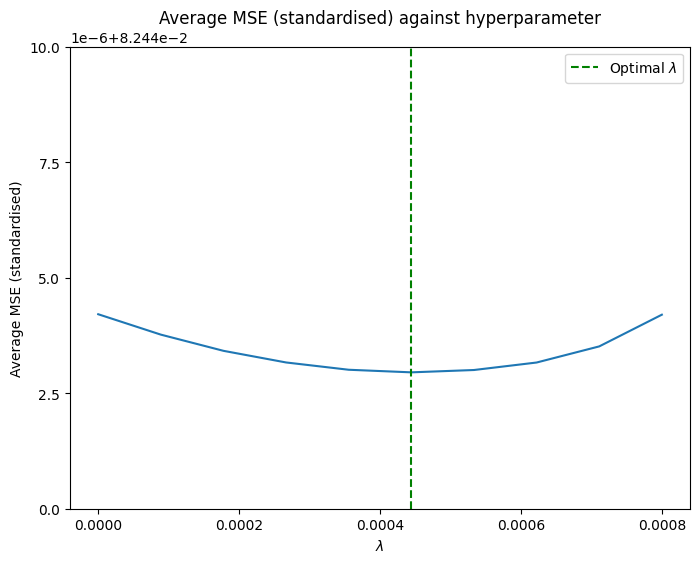

In [50]:
CVEN.hyper_parameter_array_search(np.linspace(0, 0.0008, 10), 0.5, y_low=0.08244, y_high=0.08245)

Out-of-sample MSE and $R^2$

In [51]:
elastic_net_params.append(ElasticNetOutSampleWrapper((0.00044444444444444447, 0.5)))

Out-of-sample MSE for alpha=0.5 is 1.9844248545995273
Out-of-sample R^2 for alpha=0.5 is 0.9083156160682488


$\alpha=0.9$

Optimal hyperparameter: 0.0005333333333333334


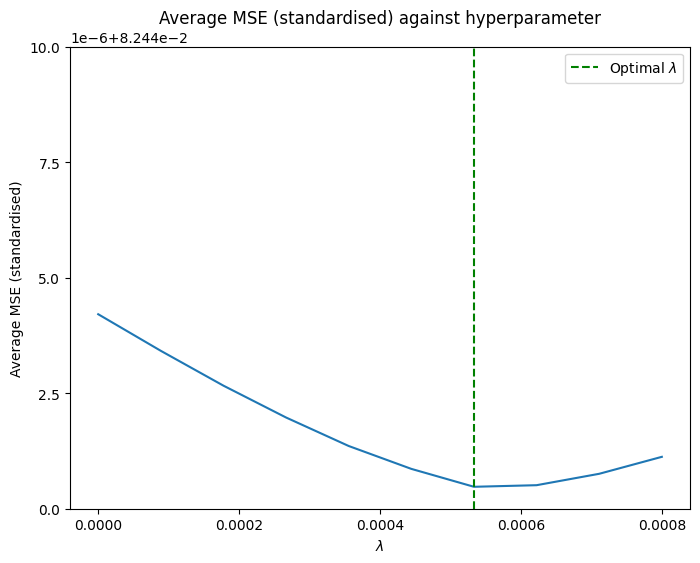

In [52]:
CVEN.hyper_parameter_array_search(np.linspace(0, 0.0008, 10), 0.9, y_low=0.08244, y_high=0.08245)

Out-of-sample MSE and $R^2$

In [53]:
elastic_net_params.append(ElasticNetOutSampleWrapper((0.0005333333333333334, 0.9)))

Out-of-sample MSE for alpha=0.9 is 1.9837230599636115
Out-of-sample R^2 for alpha=0.9 is 0.908348040379349


Summary table

| $\alpha$  | Out-of-sample MSE | Out-of-sample $R^2$ |
| --- | --- | --- |
|0.1|1.9845434132434565|0.9083101384225707|
|0.5|1.9844248545995273|0.9083156160682488|
|0.9|1.9837230599636115|0.908348040379349|

Since $\alpha=0.9$ gives the lowest out-of-sample MSE and highest out-of-sample $R^2$ score, it gives the best model.

1.3.3

#### Visualising parameters obtained across $\alpha=0.1, 0.5, 0.9$

We make comparisons of the $\beta_i$ obtained under different $\alpha$

<Figure size 1600x1200 with 0 Axes>

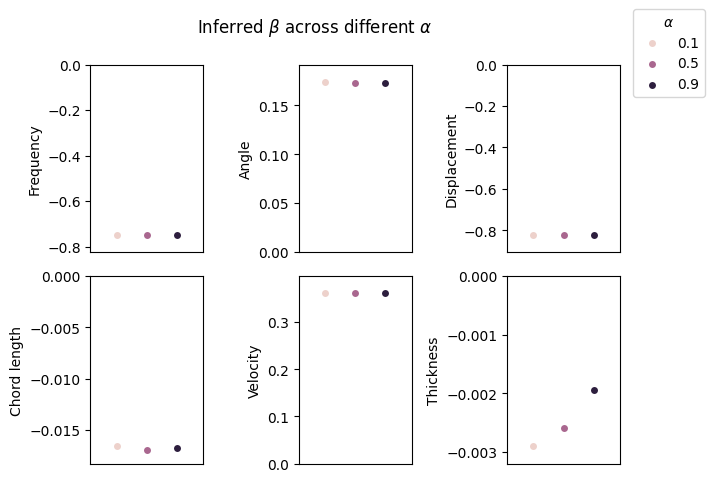

In [54]:
# This function plots the plot below
def elastic_net_plot():
    plt.figure(figsize=(16, 12))
    fig, axes = plt.subplots(2, 3)

    tpd = pd.DataFrame(elastic_net_params, columns=df.columns[:-1])
    tpd[r"alpha"] = [0.1, 0.5, 0.9]


    for i, ax in enumerate(axes.flatten()):
        var = tpd.columns[i]
        m = tpd[var][0]
        if m >= 0:
            y_lims = [0, m * 1.1]
        else:
            y_lims = [m * 1.1, 0]
        sns.stripplot(data=tpd, y=var,hue="alpha", ax=ax, jitter=False, dodge=True, legend=0).set_ylim(y_lims)
        ax.set(xlabel=None)
        ax.tick_params(axis='x', bottom=False)

    fig.legend(tpd["alpha"], title=r"$\alpha$", bbox_to_anchor=(1.12, 1.01))

    plt.suptitle(r"Inferred $\beta$ across different $\alpha$")
    plt.tight_layout()

    plt.show()

elastic_net_plot()

We see that across different $\alpha$, the same parameter has the same sign.

For thickness, the greater the $\alpha$, the more the parameter is shrunk.

### Case for $\alpha=0,0.5,1$

Recall that 'elastic net is a regularisation that combines Lasso and Ridge penalties', as stated in the coursework. If $\alpha=0$, the penalty term $||\beta||_1$ from Lasso disappears so it is equivalent to Ridge regression (with hyperparameter $\lambda$); if $\alpha=1$, the penalty term $||\beta||_2^2$ from Ridge disappears so it is equivalent to Lasso regression. For $\alpha=0.5$ it is something in between the two.

To further comment on their differences, we summarise the ideas discussed in p.69 and p.662 of *The Elements of Statistical Learning* by Hastie et al

        1. Ridge causes the parameters of strong, correlated inputs to get shrinked towards each other.
         Lasso does not do this.
        2. Roughly speaking (in the orthogonal setting), Ridge does a proportional shrinkage while
         Lasso does a constant translation, truncating at zero. As a result, the latter can do variable selection but Ridge cannot.

The case $\alpha=0.5$ is something in between, so it has properties of both methods. In particular, it still can do variable selection and can shrink parameters of correlated inputs together.

#### 1.4 kNN regression (10 marks)
1.4.1

Function for finding indices of the $k$ nearest data points.

In [55]:
def find_k_nearest(x, X_train, k):
    """
    Find the indices of the k nearest data points in X_train
    to x

    Parameters:
    -----------
    x : New observation, of shape (d,)
    X_train : Training data, of shape (N, d)
    k : Number of indices to return
    """

    # No sqrt needed, since x -> x**2 is monotone
    dists = np.sum((X_train - x)**2, axis = 1)

    # Sort distances
    sorted_dists = np.sort(dists)
    indices = np.arange(len(dists))

    # Find indices which are close enough
    indices = indices[dists <= sorted_dists[k - 1]]

    # return first k such indices
    return indices[:k]

Function to make predictions with kNN. Outputs the mean of its $k$ nearest neighbours

In [56]:
def knn_predict(X_train, y_train, X_test, k=20):
    """
    Makes predictions for observations in X_test,
    given training data
    """

    out = []
    
    # Make prediction for each new observation
    for x_test in X_test:
        neighbours = find_k_nearest(x_test, X_train, k)

        # Prediction is mean of k nearest neighbours
        y_pred = np.mean(y_train[neighbours])
        out.append(y_pred)
    
    return np.array(out)

Pack everything into the class

In [57]:
class kNN(Model):
    def train_model(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_input):
        return knn_predict(self.X_train, self.y_train, X_input, self.hparams)
    
    def evaluate_model(self, y_true, X_input, metric='mse'):
        """
        Evaluate model using mse or R2

        Parameters:
        -----------
        y_true : true outcomes
        X_input : Inputs for prediction
        """

        # make prediction
        predicted = self.predict(X_input)

        # get evaluation metric
        if metric == 'mse':
            return get_MSE(y_true, predicted)
        
        if metric in {'R2', 'r2'}:
            return get_R2(y_true, predicted)

Make class for cross validation and hyperparameter selection

In [58]:
class CrossValidationkNN(CrossValidationRegression):
    def __init__(self, X_trains, X_vals, y_trains, y_vals) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, kNN)

    # For plotting and searching
    def hyper_parameter_array_search(self, hparams, y_low=0.0824, y_high=0.0827, plot=True):

        mse_arr = []
        for h in hparams:
            mse_arr.append(self.cv_loss(h))
        
        # Get hyperparameter minimising the average mse
        optimal_hparam = hparams[min(range(len(hparams)), key=mse_arr.__getitem__)]

        if plot:
            plt.figure(figsize=(8, 6))
            plt.title("Average (standardised) MSE against hyperparameter")
            plt.ylabel("Average (standardised) MSE")
            plt.xlabel(r"$\lambda$")
            plt.plot(hparams, mse_arr)
            plt.ylim(y_low, y_high)
            plt.axvline(optimal_hparam, color='green', linestyle='--', label=r"Optimal $\lambda$")
            plt.legend()
            plt.locator_params(axis='y', nbins=4)
            plt.locator_params(axis='x', nbins=5)
        print(f"Optimal hyperparameter: {optimal_hparam}")

Search for optimal hyperparameter

Optimal hyperparameter: 11


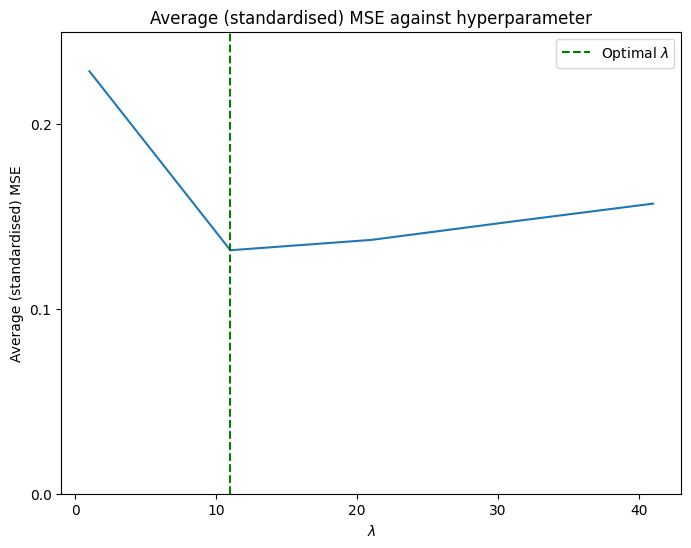

In [59]:
cvkNN = CrossValidationkNN(X_trains_split, X_vals_split, y_trains_split, y_vals_split)
cvkNN.hyper_parameter_array_search(np.arange(1, 50, 10), y_low=0, y_high=0.25)

Optimal hyperparameter: 7


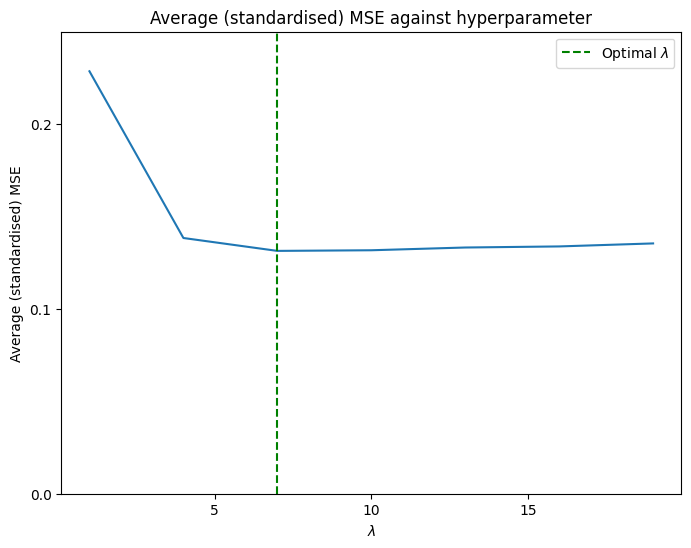

In [60]:
cvkNN.hyper_parameter_array_search(np.arange(1, 20, 3), y_low=0, y_high=0.25)

Optimal hyperparameter: 7


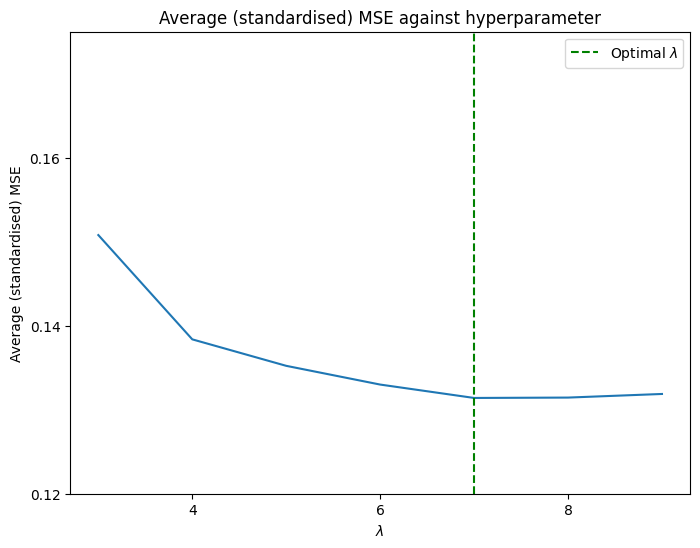

In [61]:
cvkNN.hyper_parameter_array_search(np.arange(3, 10), y_low=0.12, y_high=0.175)

Hence, the optimal hyperparameter is
$$
k=7
$$

1.4.2

Find out of sample MSE and $R^2$ for kNN

In [62]:
kNN_optimal = kNN(7)
kNN_optimal.train_model(X_train_data, y_train)
kNN_mse = kNN_optimal.evaluate_model(y_test, X_test_data, metric='mse')
kNN_r2 = kNN_optimal.evaluate_model(y_test, X_test_data, metric='r2')

print(f"kNN out-of-sample MSE: {kNN_mse}")
print(f"kNN out-of-sample R^2: {kNN_r2}")

kNN out-of-sample MSE: 11.536435299573192
kNN out-of-sample R^2: 0.4669936930298477


## Comparing the performances of different models

In this section, we will look at the out-of-sample MSE and $R^2$ only. This is because we are interested most in how the models will predict unseen data. For reasons mentioned above, the out-of-sample versions serve our need better (as opposed to in-sample versions) because the models have not seen this data during training.
|  |  Out-of-sample MSE | Out-of-sample R^2|
| --- |  --- | --- |
| OLS |1.984  |0.908  |
| Lasso | 1.984 | 0.908 |
|Elastic Net | 1.984 | 0.908 |
|kNN | 11.54| 0.467|

First, we see that the class of linear models have a very similar performance. However, the performance of kNN is significantly poorer than the linear models. The MSE is approximately 5.8 times of that in the linear model; while the proportion of variance explained on the test data is roughly half of that in the linear model. One possible explanation for this might be the existence of some *global, approximately linear* relationship between the predictors and outcomes.

Recall that kNN is a *local* approximation in the sense that the predicted value is only affected by the $k$-nearest data points in the training set. Points outside these $k$ data points have *no effect* on the predicted outcome. Contrarily, the predicted value under linear models does not have this property. Training data far from the observed data can have a strong influence on the predicted outcome. Since kNN performed a lot worse, we may guess the existence of some 'global' relationship which is relatively well explained by linear approximation, since linear models seem to explain $90\%$ of variance in the test data.

## Task 2: Classification  (50 marks)



Load the train data

In [63]:
diabetes_train_df = pd.read_csv("diabetes_samples.csv", decimal=",")
diabetes_train_df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,115,224,85,30,7.5,36,69,205,30.3,150,99,37,41,0.90,No diabetes
1,318,194,95,36,5.4,63,58,210,43.9,140,100,44,53,0.83,No diabetes
2,73,207,75,44,4.7,30,72,180,24.4,118,62,35,41,0.85,No diabetes
3,69,144,81,28,5.1,30,72,165,22.4,118,78,31,38,0.82,No diabetes
4,326,181,177,24,7.5,64,71,225,31.4,130,66,44,47,0.94,Diabetes


Set index to patient number and inspect the data

In [64]:
diabetes_train_df = diabetes_train_df.set_index("patient_number")
diabetes_train_df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
patient_number,,,,,,,,,,,,,,
115,224,85,30,7.5,36,69,205,30.3,150,99,37,41,0.90,No diabetes
318,194,95,36,5.4,63,58,210,43.9,140,100,44,53,0.83,No diabetes
73,207,75,44,4.7,30,72,180,24.4,118,62,35,41,0.85,No diabetes
69,144,81,28,5.1,30,72,165,22.4,118,78,31,38,0.82,No diabetes
326,181,177,24,7.5,64,71,225,31.4,130,66,44,47,0.94,Diabetes


Look at description of data to see whether there can be potential errors. It looks fine. For example, age, height, weight are positive.

In [65]:
diabetes_train_df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,208.868132,108.864469,50.531136,4.493407,47.622711,66.032967,177.424908,28.690842,136.772894,82.553114,37.941392,43.102564,0.881062
std,45.051737,55.762363,17.041255,1.573433,17.110598,3.867618,40.460071,6.560658,22.621073,13.161257,5.744903,5.834459,0.072060
min,78.000000,52.000000,12.000000,2.000000,19.000000,55.000000,99.000000,17.200000,98.000000,50.000000,26.000000,32.000000,0.700000
25%,179.000000,81.000000,39.000000,3.200000,34.000000,63.000000,151.000000,23.800000,121.000000,74.000000,33.000000,39.000000,0.830000
50%,204.000000,90.000000,46.000000,4.200000,45.000000,66.000000,174.000000,27.900000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,232.000000,108.000000,59.000000,5.400000,61.000000,69.000000,200.000000,32.200000,148.000000,90.000000,42.000000,46.000000,0.930000
max,404.000000,385.000000,120.000000,12.200000,92.000000,76.000000,308.000000,50.500000,250.000000,118.000000,53.000000,64.000000,1.090000


In [66]:
diabetes_train_df.dtypes

cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object

Again, we shuffle data to ensure balanced splits in cross validation

In [67]:
# Shuffle data
diabetes_train_df = diabetes_train_df.iloc[np.random.permutation(len(diabetes_train_df))]


diabetes_train_X = diabetes_train_df[diabetes_train_df.columns[:-1]]
diabetes_train_X = diabetes_train_X.to_numpy()
diabetes_train_y = diabetes_train_df[diabetes_train_df.columns[-1]]
diabetes_train_y = diabetes_train_y.astype("str").to_numpy().flatten()

diabetes_feature_names = diabetes_train_df.columns[:-1]


Import test data

In [68]:
diabetes_test_df = pd.read_csv("diabetes_test.csv", decimal=",")
diabetes_test_df = diabetes_test_df.set_index("patient_number")
diabetes_test_X = diabetes_test_df[diabetes_train_df.columns[:-1]]
diabetes_test_X = diabetes_test_X.to_numpy()
diabetes_test_y = diabetes_test_df[diabetes_test_df.columns[-1]]
diabetes_test_y = diabetes_test_y.astype("str").to_numpy().flatten()

#### 2.1 Random forest (20 marks)
2.1.1

The code in this section is mainly based on that from the weekly notebooks. I have made changes where I think are suitable and added some comments.

Define the function for evaluating the *information criterion*, which is cross entropy

In [70]:
def cross_entropy(labels, weights = None):
    """ 
    Calculate the cross-entropy for labels.

    Parameters:
    -----------
    labels : Vector of labels, of shape (N,)
    weights : Weights for each label, of shape (N,)

    Outputs:
    --------
    (float)
    """

    # Default uniform weight
    if weights is None:
        weights = np.ones(len(labels))


    label_weights = {label : 0 for label in labels}

    # Compute aggregate weight for each label
    for label, w in zip(labels, weights):
        label_weights[label] += w
    

    p_vector = np.array(list(label_weights.values()))
    p_vector = p_vector / np.sum(p_vector)

    # Expected value of log(p)
    cross_entropy = - sum(p_vector * np.log(p_vector))
    return cross_entropy

Define a function which splits the data at at a certain threshold for a given input variable.

In [71]:
def split_samples(X, y, col_index, threshold):
    """
    Split X and y using the column indexed by col_index
    according to threshold. Outputs are of the form
    (left, right) where left is the data where input < threshold.

    Parameters:
    -----------
    X : Matrix of inputs, of shape (N, D)
    y : Vector of output labels, of shape (N,)
    col_index : int, index for splitting
    threshold : float, inputs are split according whether 
    input variable is < threshold

    Outputs:
    --------
    tuple(np.array, np.array): tuple of subsets of X
    tuple(np.array, np.array): tuple of subsets of y
    """

    # Filter for data where input < threshold
    mask = (X[:, col_index] < threshold)

    # Helper function to split an array x according to mask
    mask_split = lambda x: (x[mask, ...], x[~mask, ...])

    return mask_split(X), mask_split(y)

Note that we are using a greedy algorithm, so given an index, we find the splitting threshold which minimises the change in the loss at the current step.

In [72]:
def find_split_threshold(X, y, col_index, loss_func=cross_entropy):
    """
    Finds the splitting threshold for input variable indexed by col_index

    Parameters:
    -----------
    X : Matrix of inputs, of shape (N, D)
    y : Vector of output labels, of shape (N,)
    col_index : int, index for searching for threshold

    Outputs:
    (float, float) : Resulted loss function and threshold for splitting
    """

    # Collection of possible thresholds
    thresholds = np.unique(X[:col_index])

    # Remove minimum value from threshold since this
    # is a trivial split. Note np.unique returns the 
    # sorted array, so [1: ] indeed removes the minimum

    thresholds = thresholds[1:]
    loss, threshold = np.inf, None

    for val in thresholds:
        # Split data using val

        (X_l, X_r), (y_l, y_r) = split_samples(X, y, col_index, val)

        # Probability of being in left / right splits
        p_left = len(y_l) / (len(y))
        p_right = 1 - p_left

        new_loss = p_left * loss_func(y_l) + p_right * loss_func(y_r)

        # Update minimal loss and threshold if better split found
        if new_loss < loss:
            loss, threshold = new_loss, val
    
    # Return loss and threshold under best split
    return loss, threshold

Then, we pick n_features at random and find the best split among them.

In [73]:
def random_forest_split(X, y, n_features=None, loss_func=cross_entropy):
    """
    Pick a random subset of features of size n_features. 
    Find the best split according to this subset.

    Parameters:
    -----------
    X : Matrix of inputs, of shape (N, D)
    y : Vector of output labels, of shape (N,)
    n_features : Number of features to consider, int

    Outputs:
    --------
    (float, int, float): the minimized loss, the index of best feature and splitting threshold
    """
    # List of column indices
    feature_indices = list(range(X.shape[1]))

    if n_features is None:
        n_features = X.shape[1]

    subset_indices = np.random.choice(feature_indices, n_features, replace=False)
    min_loss, col_index, split_val = np.inf, None, 0

    for index in subset_indices:
        # Skip if column only has one distinct value
        if len(np.unique(X[:, index])) <= 1:
            continue
        
        # Find optimal split for feature indexed by index
        cur_loss, cur_threshold = find_split_threshold(X, y, index, loss_func)

        # Update best split if current split is better
        if cur_loss < min_loss:
            min_loss, col_index, split_val = cur_loss, index, cur_threshold
    
    return min_loss, col_index, split_val

Create a helper function which helps us find the most commonly occurring label

In [74]:
def majority_vote(y):
    """
    Return the most frequent label in y.

    Parameters:
    -----------
    y : Vector of output labels, of shape (N,)

    Outputs:
    --------
    (obj) : label
    """
    unique, counts = np.unique(y, return_counts=True)
    return unique[counts.argmax()]

Builds one tree in the forest

In [75]:
def random_forest_build_tree(n_features, X, y, feature_names, depth, max_depth):
    """
    Build a tree as part of a random forest

    Parameters:
    -----------
    n_features : Number of random features chosen at each split
    X : Feature matrix, of shape (N, D)
    y : Array of labels, of shape (N,)
    feature_names : name of features, list(str)
    depth : current depth
    max_depth : maximum depth of tree, int
    
    Outputs:
    --------
    (tree)   
    """
    
    # If all labels are the same or max depth is reached, stop the split
    if len(np.unique(y)) <= 1 or depth >= max_depth:
        return {'majority_label': majority_vote(y)}

    else:
        # Find best split of random subset of features of size n_features
        min_loss, split_index, split_val = random_forest_split(X, y, n_features, loss_func=cross_entropy)
    
        if min_loss == np.inf:
            return {'majority_label': majority_vote(y)}
    
    (X_l, X_r), (y_l, y_r) = split_samples(X, y, split_index, split_val)

    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'majority_label': None,
        'left': random_forest_build_tree(n_features, X_l, y_l, feature_names, depth + 1, max_depth),
        'right': random_forest_build_tree(n_features, X_r, y_r, feature_names, depth + 1, max_depth)
    }

Function for bootstrapping in random forest. Allows an option so labels are sampled evenly (despite uneven distribution in dataset).

In [77]:
def bootstrap(X, y, M, weighted_bootstrap=False):
    """
    Produce M samples from the data with replacement

    Parameters:
    ----------
    X : Matrix of inputs, of shape (N, D)
    y : Vector of output labels, of shape (N,)
    M : Number of samples, int
    weighted_bootstrap : bool, if true then all
    labels are sampled evenly. If false then a uniform
    probability is used

    Outputs:
    --------
    tuple(np.array, np.array) : X_sample, y_sample
    """

    # Number of rows
    N = len(y)

    indices = list(range(N))

    if weighted_bootstrap:
        unique, counts = np.unique(y, return_counts=True)
        weights = np.ones(N)

        for val, count in zip(unique, counts):
            weights[y == val] = 1 / count
    
    else:
        weights = np.ones(N)
    
    weights = weights / sum(weights)
    sampled_indices = np.random.choice(indices, size=M, replace=True, p=weights)
    return X[sampled_indices], y[sampled_indices]

Functions for training random forest and making predictions decision trees

In [79]:
def random_forest_train(X, y, feature_names, B, r, n_features, max_depth, weighted_bootstrap=False):
    """
    Train a random forest

    Parameters:
    -----------
    X : Feature matrix, of shape (N, D)
    y : Array of labels, of shape (N,)
    feature_names : name of features, list(str)

    B : Number of trees, int
    r : N * r samples will be sampled for each bootstrap step, float
    n_features : Number of random features chosen at each split
    max_depth : maximum depth of tree, int
    weighted_bootstrap : bool
    
    Outputs:
    --------
    A list of trees obtained    
    """

    trees = []

    N = len(y)

    bootstrap_size = int(r * N)
    for i in range(B):
        X_sample, y_sample= bootstrap(X, y, bootstrap_size, weighted_bootstrap)
        tree = random_forest_build_tree(n_features, X_sample, y_sample, feature_names, depth=1, max_depth=max_depth)
        trees.append(tree)
    
    return trees


def classify(tree, x):
    """
    Make a prediction based on a single sample x using tree

    Parameters:
    -----------
    tree : decision tree
    x : Array of features, np.array

    Outputs:
    --------
    (label)    
    """

    # Reached terminal
    if tree['majority_label'] is not None: 
        return tree['majority_label']
    
    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)


def predict(tree, X):
    """
    Make prediction based on a matrix of features X
    using a decision tree

    Parameters:
    -----------
    tree : decision tree
    X : Matrix of features, of shape (N, D)

    Outputs:
    --------
    (array) labels
    """
    
    return np.array([classify(tree, x) for x in X])

Make predictions with random forest. Allows custom thresholding so the positive label is voted if at least a proportion of trees vote for that label.

In [80]:
def predict_random_forest(rf, X, threshold=None, out_labels=[1, -1]):
    """
    Make prediction based on a matrix of features X
    using a random forest

    Parameters:
    -----------
    rf : list of decision trees, of shape (B,)
    X : Matrix of features, of shape (N, D)
    threshold : Proportion of votes needed to predict 
    a positive result. Return negative by default. 
    Only used for binary classification
    labels : [Positive label, negative label] 

    Outputs:
    --------
    (array) labels
    """
    # Matrix of predictions, of shape (B, N)
    # Each row corresponds to one tree
    decisions = np.array([predict(tree, X) for tree in rf])
    
    out = []
    # col represents the collection of labels from different trees
    # using a single input
    for col in decisions.T:
        if threshold is None:
            labels, count = np.unique(col, return_counts=True, axis=0)
            # Index of most frequent label
            argmax = np.argmax(count)
            # Most frequent label
            freq_label = labels[argmax]
            out.append(freq_label)

        else:
            positive_prop = sum(col == out_labels[0]) / len(col)

            # Positive label is voted by at least proportion of threshold
            if positive_prop >= threshold:
                out.append(out_labels[0])
            else:
                out.append(out_labels[-1])
    return np.array(out)

In [81]:
diabetes_X_trains_split, diabetes_X_vals_split  = get_splits(diabetes_train_X, 4)
diabetes_train_y_split, diabetes_train_y_vals = get_splits(diabetes_train_y, 4)

Pack everything into a class. For generality, we allow various hyperparameters to be adjusted in the random forest class

In [82]:
class RandomForest(Model):
    def __init__(self, hparams):
        super().__init__(hparams)
    
    def train_model(self, X_train, y_train):
        """
        Train the random forest

        Parameters:
        -----------
        X : Feature matrix, of shape (N, D)
        y : Array of labels, of shape (N,)
        haparams : 
        (B, r, n_features, max_depth, weighted_bootstrap)
        B : Number of decision trees
        r : Proportion of samples used in bootstrap
        n_features : Number of random features chosen at each split
        max_depth : maximum depth of tree, int
        weighted_bootstrap : bool

        Outputs:
        --------
        Random forest
        """
        
        # B, r, n_features, weighted_bootstrap = self.hparams
        self.forest = random_forest_train(X_train, y_train, diabetes_feature_names, *self.hparams)

    def predict(self, X_input, threshold=None, labels=[1, -1]):
        return predict_random_forest(self.forest, X_input, threshold, labels)
    
    def evaluate_model(self, y_true, X_input, metric="accuracy"):
        predicted = self.predict(X_input)
        if metric == "accuracy":
            return sum(predicted == y_true) / len(y_true)

Fix other hyperparameters apart from number of decision trees and maxdepth. Bootstrap sample size is set to the number of training samples, n_features is set to $4\approx \sqrt{p}$ as per the notes, since we are in the classification setting.

In [85]:
class RandomForest2Hparams(RandomForest):
    def __init__(self, hparams, weighted_bootstrap=False):
        # hparams is (B, max_depth)
        B, max_depth = hparams
        
        # B, r, n_features, weighted_bootstrap = full_hparams
        full_hparams = (B, 1, 4, max_depth, weighted_bootstrap)
        super().__init__(full_hparams)

Class used for cross validation and hyperparameter tuning

In [86]:
class CrossValidationClassification(CrossValidation):
    def cv_loss(self, hparams):
        return super().cv_loss(hparams, 'accuracy')

In [87]:
class CrossValidationRandomForest(CrossValidationClassification):
    def __init__(self, X_trains, X_vals, y_trains, y_vals, rf_model=RandomForest2Hparams) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, rf_model)
    
    def hyper_parameter_array_search(self, hparams, plot=True):

        loss_arr = []
        h1_arr, h2_arr = hparams
        hparam_tuples = [(h1, h2) for h1 in h1_arr for h2 in h2_arr]
        for h in hparam_tuples:
            loss_arr.append(self.cv_loss(h))
        
        if plot:
            h1_len, h2_len = len(h1_arr), len(h2_arr)
            loss_grid = np.reshape(loss_arr, (h1_len, h2_len))
            tt, aa = np.meshgrid(h1_arr, h2_arr)
            plt.pcolormesh(tt, aa, np.transpose(loss_grid))
            plt.colorbar()
            plt.xlabel("Number of decision trees")
            plt.ylabel("Depth of decision trees")
            # plt.ticklabel_format(axis="x", scilimits=(-4, -4))
            
            plt.xticks(h1_arr)
            plt.yticks(h2_arr)
            plt.tight_layout()
            plt.title("Accuracy heatmap")
        
        return hparam_tuples[max(range(len(hparam_tuples)), key=loss_arr.__getitem__)]

In [88]:
CVRF = CrossValidationRandomForest(diabetes_X_trains_split, diabetes_X_vals_split, diabetes_train_y_split, diabetes_train_y_vals)

We now do a grid search on the hyperparameters. Note that the number of decision trees mainly affect the stability of the forest, as opposed to asymptotic accuracy.

(10, 18)

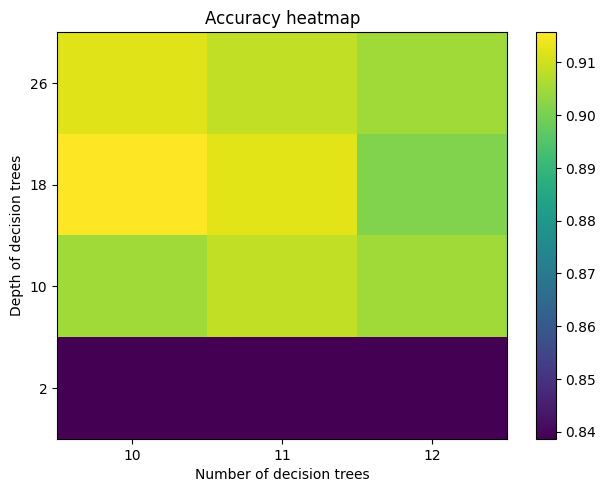

In [89]:
CVRF.hyper_parameter_array_search(([10, 11, 12], [2, 10, 18, 26]), plot=True)

We see that depth=2 is clearly inferior. But there is still uncertainty for other depths. We can try to use more trees to stabilise the behavior, but this needs more computation time so we limit ourselves to trees with lower depth

(51, 8)

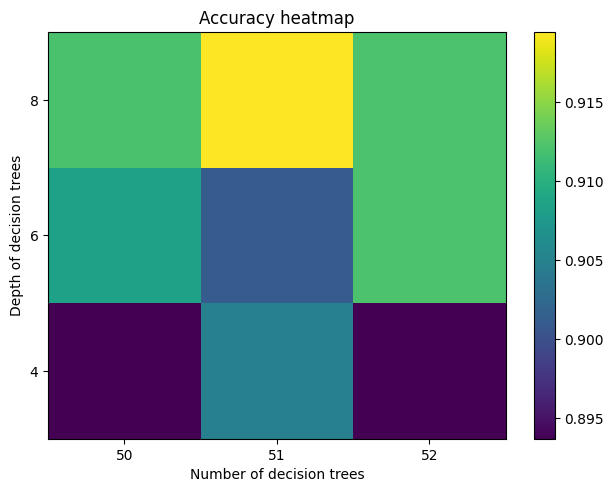

In [91]:
CVRF.hyper_parameter_array_search(([50, 51, 52], [4, 6, 8]), plot=True)

(31, 7)

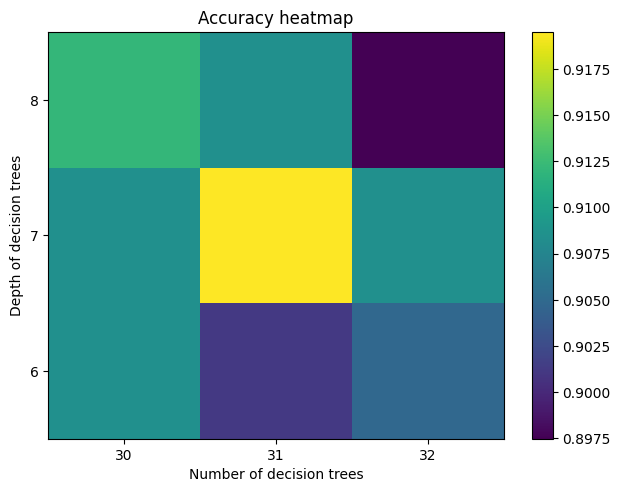

In [137]:
CVRF.hyper_parameter_array_search(([30, 31, 32], [6, 7, 8]), plot=True)

We will settle with the hyperparameters:
$$
31 \text{ decision trees, } \text{max depth}=7
$$

2.1.2

Firstly, we define the confusion matrix and related measures

In [138]:
def confusion_matrix(y_pred, y_true, labels=[1, -1], plot=True):
    """"
    Returns the confusion matrix and makes a plot
    """

    out = np.zeros((2, 2))
    N = len(y_true)
    mask = y_true == y_pred
    correct_arr = y_true[mask]
    incorrect_arr = y_true[~mask]

    # Diagonal entries, where predictions are correct
    out[0, 0] = sum(correct_arr == labels[0])
    out[1, 1] =  len(correct_arr) - out[0, 0]

    # Off diagonal, where predictions are wrong
    out[0, 1] = sum(incorrect_arr == labels[-1])
    out[1, 0] = len(incorrect_arr) - out[0, 1]

    if plot:
        sns.heatmap(out, annot=True)
        plt.xlabel("Actual label")
        plt.ylabel("Predicted label")
        plt.xticks(ticks=[0.5, 1.5], labels=labels)
        plt.yticks(ticks=[0.5, 1.5], labels=labels)
    return out

def precision(cm):
    """
    Compute the precision for confusion matrix
    """
    TP = cm[0, 0]
    FP = cm[0, 1]

    return TP / (TP + FP)

def recall(cm):
    """
    Compute the recall for confusion matrix
    """
    TP = cm[0, 0]
    FN = cm[1, 0]
    return TP / (TP + FN)

def accuracy(cm):
    """
    Compute the accuracy for confusion matrix
    """
    TP = cm[0, 0]
    TN = cm[1, 1]
    return (TP + TN) / np.sum(cm)

def F_score(cm):
    """
    Compute the F-score for confusion matrix
    """
    p, r = precision(cm), recall(cm)
    return 2 * (p * r) / (p + r)

def cm_measures(cm):
    """
    Return accuracy, precision, and F-score 
    """
    return accuracy(cm), precision(cm), F_score(cm)

Train forest on full train set 

In [140]:
rf_optimal = RandomForest2Hparams((31, 7))
rf_optimal.train_model(diabetes_train_X, diabetes_train_y)

Make predictions on training set

In [141]:
rf_train_pred = rf_optimal.predict(diabetes_train_X)

Confusion matrix

Text(0.5, 1.0, 'Unweighted random forest confusion matrix on train set')

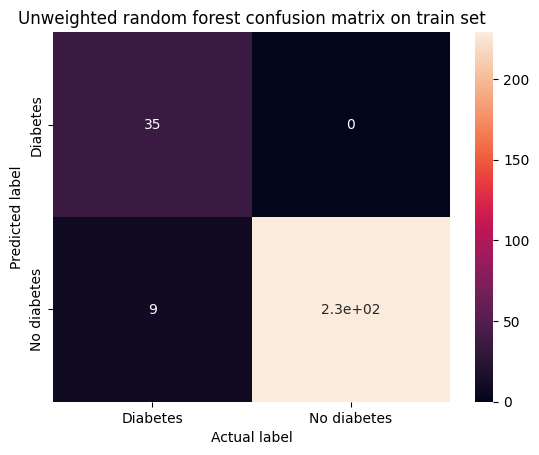

In [162]:
rm_cm_unweighted_train = confusion_matrix(rf_train_pred, diabetes_train_y, labels=["Diabetes", 'No diabetes'])
plt.title("Unweighted random forest confusion matrix on train set")

Quality measures on train set

In [143]:
rf_acc_train, rf_precision_train, rf_f_score_train =  cm_measures(rm_cm_unweighted_train)

print(f"Accuracy for random forest (unweighted) in training set: {rf_acc_train}")
print(f"Precision for random forest (unweighted) in training set: {rf_precision_train}")
print(f"F score for random forest (unweighted) in training set: {rf_f_score_train}")

Accuracy for random forest (unweighted) in training set: 0.967032967032967
Precision for random forest (unweighted) in training set: 1.0
F score for random forest (unweighted) in training set: 0.8860759493670886


Make predictions on test set

In [144]:
rf_test_pred = rf_optimal.predict(diabetes_test_X)

Confusion matrix from random forest

Text(0.5, 1.0, 'Unweighted random forest confusion matrix on test set')

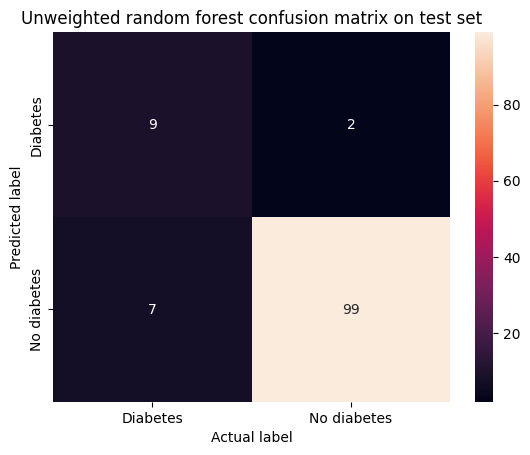

In [163]:
rm_cm_unweighted = confusion_matrix(rf_test_pred, diabetes_test_y, labels=["Diabetes", 'No diabetes'])
plt.title("Unweighted random forest confusion matrix on test set")

Quality measures on test set

In [146]:
rf_acc, rf_precision, rf_f_score =  cm_measures(rm_cm_unweighted)

print(f"Accuracy for random forest (unweighted) in test set: {rf_acc}")
print(f"Precision for random forest (unweighted) in test set: {rf_precision}")
print(f"F score for random forest (unweighted) in test set: {rf_f_score}")

Accuracy for random forest (unweighted) in test set: 0.9230769230769231
Precision for random forest (unweighted) in test set: 0.8181818181818182
F score for random forest (unweighted) in test set: 0.6666666666666666


Interpreting measures on the test set

We interpret the results below:

1.The accuracy implies the random forest got around $93\%$ of predictions correct on the test set. We can say that, given an arbitrarily patient which we have not seen before, the probability of predicting whether they have diabetes correctly is around this value, which is good since it is quite high. 

2.The precision implies that among the patients which are predicted to have diabetes, around $82\%$ of them actually have diabetes. Note that this is lower than before, which is not ideal. Given that a new patient is predicted to have diabetes, there is around $17\%$ chance that they do not actually have it, which may lead to wasted resources and unnecessary concern

3.The F-score takes into account the precision and recall of the test. It ranges from zero to one. It is difficult to give a physical interpretation for this combined metric, but a high F-score implies that both precision and recall are high. A low F-score implies at least one of precision or recall is low.

##### Comparing performance of test and train set predictive power

|  | Accuracy |Precision |F score|
| --- | --- | --- |---|
| Train|0.97 | 1 | 0.89|
|Test| 0.92 | 0.82| 0.67|

Firstly, we note that the random forest has extremely good performance on the train set. However, this performance worsens when we look at the test set. Previously, the model had extremely high accuracy and precision. In particular, in the training set, all the patients which were thought to have diabetes actually had it. Around $20\%$ of diabetes patients were not detected. Contrarily,  in the test set, over $40\%$ of diabetes patients were not detected and 2 of the 11 patients predicted to have diabetes did not have it.

This is most likely due to overfitting

2.1.3

Demonstrating that dataset is unbalanced

In [147]:
positive_prop = sum(diabetes_train_y == "Diabetes") / len(diabetes_train_y)
negative_prop = 1 - positive_prop

print(f"Proportion of patients with diabetes in training set is {positive_prop}")
print(f"Proportion of patients without diabetes in training set is {negative_prop}")

Proportion of patients with diabetes in training set is 0.16117216117216118
Proportion of patients without diabetes in training set is 0.8388278388278388


Clearly most patients do not have diabetes

#### Weighted random forest

We create a class which weights the data appropriately when performing bootstrap. Note that the code for reweighting samples was built into the bootstrap sampling function, so we don't need to write excess code.

In [148]:
class RandomForest2HparamsWeighted(RandomForest2Hparams):
    def __init__(self, hparams, weighted_bootstrap=True):
        super().__init__(hparams, weighted_bootstrap)

class CrossValidationRandomForestWeighted(CrossValidationRandomForest):
    def __init__(self, X_trains, X_vals, y_trains, y_vals) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, RandomForest2HparamsWeighted)

Do a grid search to find hyperparameters

(14, 12)

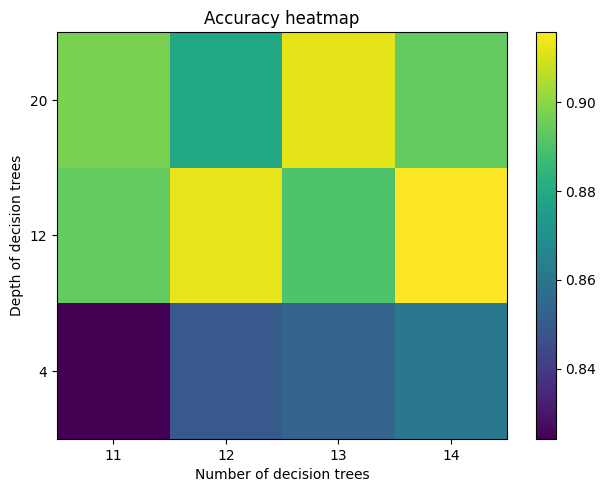

In [110]:
CVRF_weighted = CrossValidationRandomForestWeighted(diabetes_X_trains_split, diabetes_X_vals_split, diabetes_train_y_split, diabetes_train_y_vals)
CVRF_weighted.hyper_parameter_array_search(([11, 12, 13, 14], [4, 12, 20]))

(31, 8)

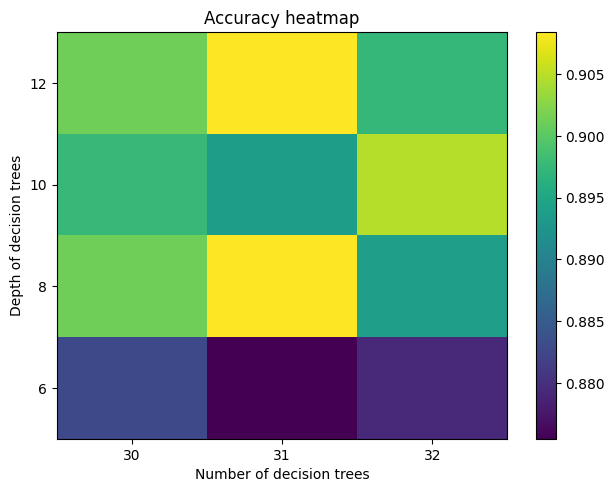

In [134]:
CVRF_weighted.hyper_parameter_array_search(([30, 31, 32], [6, 8, 10, 12]))

(31, 7)

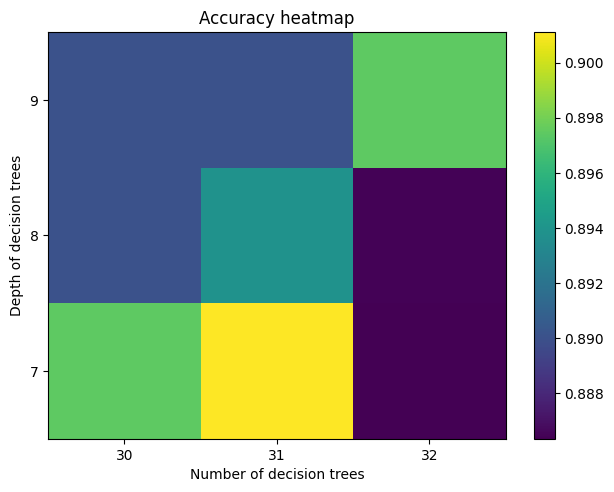

In [135]:
CVRF_weighted.hyper_parameter_array_search(([30, 31, 32], [7, 8, 9]))

We take hyperparameters
$$
\text{Number of decision trees}=31, \text{ Max depth} = 7
$$
and train the weighted random forest on the whole training set

In [149]:
weighted_rf = RandomForest2HparamsWeighted((31, 7))
weighted_rf.train_model(diabetes_train_X, diabetes_train_y)

First we make predictions on training set

Text(0.5, 1.0, 'Weighted random forest confusion matrix on train set')

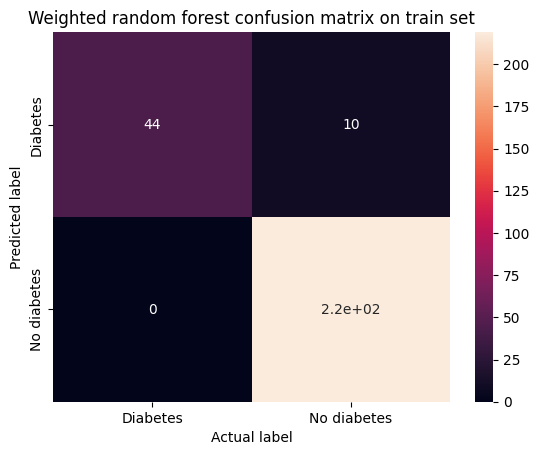

In [160]:
rf_pred_weighted_train = weighted_rf.predict(diabetes_train_X)
rm_cm_weighted_train = confusion_matrix(rf_pred_weighted_train, diabetes_train_y, labels=["Diabetes", 'No diabetes'])
rf_acc_w_train, rf_precision_w_train, rf_f_score_w_train =  cm_measures(rm_cm_weighted_train)
plt.title("Weighted random forest confusion matrix on train set")

In [151]:
print(f"Accuracy for random forest (weighted) in training set: {rf_acc_w_train}")
print(f"Precision for random forest (weighted) in training set: {rf_precision_w_train}")
print(f"F score for random forest (weighted) in training set: {rf_f_score_w_train}")

Accuracy for random forest (weighted) in training set: 0.9633699633699634
Precision for random forest (weighted) in training set: 0.8148148148148148
F score for random forest (weighted) in training set: 0.8979591836734693


Then we make predictions on the test set

In [152]:
rf_test_pred_weighted = weighted_rf.predict(diabetes_test_X)

Text(0.5, 1.0, 'Weighted random forest confusion matrix on test set')

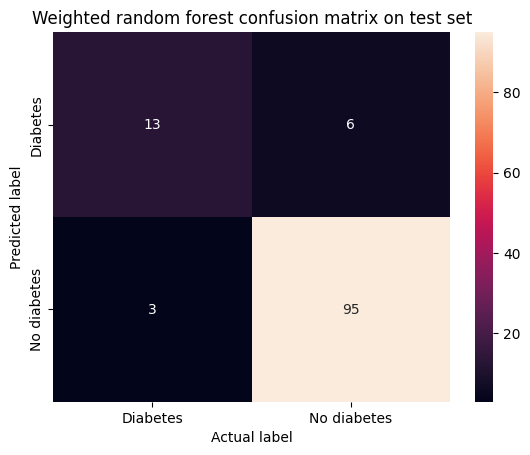

In [164]:
rm_cm_weighted = confusion_matrix(rf_test_pred_weighted, diabetes_test_y, labels=["Diabetes", 'No diabetes'])
plt.title("Weighted random forest confusion matrix on test set")

In [165]:
rf_acc_w, rf_precision_w, rf_f_score_w =  cm_measures(rm_cm_weighted)

print(f"Accuracy for random forest (weighted) in test set: {rf_acc_w}")
print(f"Precision for random forest (weighted) in test set: {rf_precision_w}")
print(f"F score for random forest (weighted) in test set: {rf_f_score_w}")

Accuracy for random forest (weighted) in test set: 0.9230769230769231
Precision for random forest (weighted) in test set: 0.6842105263157895
F score for random forest (weighted) in test set: 0.742857142857143


#### Comparing preformance of weighted and unweighted random forest

|  | Accuracy |Precision |F score|
| --- | --- | --- |---|
| Train (unweighted)|0.97 | 1 | 0.89|
|Test (unweighted)| 0.92 | 0.82| 0.67|
| Train (weighted)|0.96 | 0.81 | 0.90|
|Test (weighted)| 0.92 | 0.68| 0.74|

In [171]:
recall(rm_cm_unweighted)

0.5625

We see that the F score of the weighted random forest is higher but the precision is lower on the test set. This suggests that the weighted random forest has sacrificed precision for recall. 

Indeed, looking at precision in the test set, the value is $0.68$ in the weighted version; whereas the value for the unweighted version is $0.82$. This means that more patients will be falsely told that they have diabetes in the weighted setting.

Looking at recall of the test set, the value is $0.81$ for the weighted version; whereas the value is $0.56$. This is related to the false negative rate:

The false negative rate for the weighted random forest in the test set is $\frac{3}{16}$ while that of unweighted random forest is $\frac{7}{16}$, so the weighted version is better at detecting diabetes patients (given the patient has diabetes).

### Next, we look at the ROC and precision-recall curve

Define functions to for measures used in ROC and precision-recall

In [172]:
def tpr(cm):
    """
    Get true positive rate
    """
    TP = cm[0, 0]
    FN = cm[1, 0]
    return TP / (TP + FN)

def tnr(cm):
    """
    Get true negative rate
    """
    TN = cm[1, 1]
    FP = cm[0, 1]
    
    return TN / (TN + FP)

def fpr(cm):
    """
    Get false positive rate
    """
    return 1 - tnr(cm)

def roc_plot(cm_arr, legend):
    fpr_arr = [fpr(cm) for cm in cm_arr]
    tpr_arr = [tpr(cm) for cm in cm_arr]
    plt.plot(fpr_arr, tpr_arr, label=legend)

def rf_vary_threshold(rf:RandomForest, thresholds, labels, X_input, y_true):
    out = []
    for thres in thresholds:
        pred = rf.predict(X_input=X_input, threshold=thres, labels=labels)
        cm = confusion_matrix(pred, y_true, labels=labels, plot=False)
        out.append(cm)
    return out

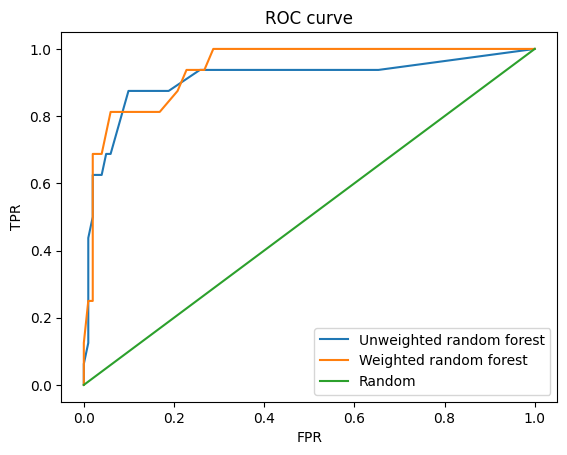

In [178]:
x_arr = np.linspace(0, 1, 50)
cms = rf_vary_threshold(rf_optimal, x_arr, ["Diabetes", "No diabetes"], diabetes_test_X, diabetes_test_y)
csm_w = rf_vary_threshold(weighted_rf, x_arr, ["Diabetes", "No diabetes"], diabetes_test_X, diabetes_test_y)
roc_plot(cms, "Unweighted random forest")
roc_plot(csm_w, "Weighted random forest")
plt.plot(x_arr, x_arr, label="Random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend()

We see that the areas under both curves are over $0.5$, and the curve for weighted random forest seems to have greater AUC than the unweighted version, so we might be inclined to prefer the weighted version more. However, this depends on what criteria (TPR, accuracy etc) which we care most about, which depends on the problem at hand.

In [176]:
def precision_recall_plot(cm_arr, legend):
    prec_arr = [precision(cm) for cm in cm_arr]
    recall_arr = [recall(cm) for cm in cm_arr]
    plt.plot(recall_arr, prec_arr, label=legend)

C:\Users\Prog\AppData\Local\Temp\ipykernel_11860\3277820968.py:35: RuntimeWarning: invalid value encountered in scalar divide
  return TP / (TP + FP)


Text(0.5, 1.0, 'Precision-Recall curve')

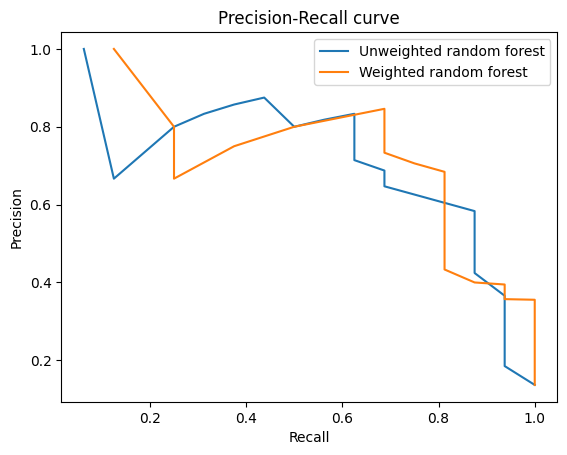

In [179]:
x_arr = np.linspace(0, 1, 50)
cms = rf_vary_threshold(rf_optimal, x_arr, ["Diabetes", "No diabetes"], diabetes_test_X, diabetes_test_y)
csm_w = rf_vary_threshold(weighted_rf, x_arr, ["Diabetes", "No diabetes"], diabetes_test_X, diabetes_test_y)
precision_recall_plot(cms, "Unweighted random forest")
precision_recall_plot(csm_w, "Weighted random forest")
# plt.plot(x_arr, x_arr, label="Random")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall curve")

We see that in some regions, the orange graph is higher than the blue curve and vice versa in other regions. This means on some levels of recall, sometimes weighted random forest give a higher precision, sometimes the unweighted give a higher precision. 

We notice that there is some error message for cases when recall is too low (and parts of the graph is missing). This is because the models produce no positive predictions, so accuracy is not defined. This is not an issue, because models which produce no positive predictions are not very useful.

#### 2.2	Support Vector Machine (SVM) (30 marks)
2.2.1

We want to minimise
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \lambda \sum_{i=1}^N \max \bigg( 0, 1-y_i (x^{(i)} \cdot \boldsymbol w  + b) \bigg) \, .
$$
We write this in matrix form by adding a column of ones to the right of $X$ and packing the $\boldsymbol w$ and $b$ into a single vector $\boldsymbol w_b$

In [180]:
def soft_svm_cost(w_b, X, y, reg):
    """
    Compute cost for soft-margin linear SVM classifier

    Parameters:
    -----------
    w_b : Weights and bias (at the and), of shape (p + 1,)
    X : Matrix of inputs, of shape (N, p + 1)
    y : Vector of labels, of shape (N)
    reg : Regularization hyperparameter

    Output:
    -------
    (float)
    """

    # Computes the first term, removing the bias b
    # from w_b
    w_norm_sq = (np.dot(w_b, w_b) - w_b[-1]**2) / 2

    dist = 1 - y * (X @ w_b)

    # max(0, dist)
    dist[dist < 0] = 0

    # Second term
    hinge = reg * sum(dist)
    return w_norm_sq + hinge


def grad_svm_cost(w_b, X, y, reg):
    """
    Compute gradient of loss function
    for soft-margin linear SVM classifier

    Parameters:
    -----------
    w_b : Weights and bias (at the and), of shape (p + 1,)
    X : Matrix of inputs, of shape (N, p)
    y : Vector of labels, of shape (N)
    reg : Regularization hyperparameter

    Output:
    -------
    (float)
    """
    # print(f"w_b : {w_b}")
    # print(f"X: {X}")
    
    dist = 1 - y * (X @ w_b)

    # Gradient of first term
    
    grad = np.copy(w_b)
    # Since the norm doesn't include b, set
    # last element to 0
    grad[-1] = 0

    # Indicies for points with positive distance
    indices = np.arange(len(dist))[dist > 0]

    # add second term if needed
    for ind in indices:
        grad -= reg * y[ind] * X[ind]
    return grad

In [181]:
def insert_1(X):
    """
    Inserts a column of 1 to the right of X

    Parameters:
    -----------
    X : Matrix, of shape (N, D)

    Output:
    -------
    Matrix of shape (N, D+1)
    """

    # row count
    N = X.shape[0]
    X = np.c_[X, np.ones(N)]
    return X

def relabel(y):
    """
    Relabel vector y so +1 / -1 is used.
    """

    N = len(y)
    out = np.ones(N)
    out[y == "No diabetes"] = -1
    return out

# Standardise
diabetes_train_X_std, diabetes_test_X_std = standardise(diabetes_train_X, diabetes_test_X)
# Insert a column of ones to X
diabetes_train_X_std_1, diabetes_test_X_std_1 = insert_1(diabetes_train_X_std), insert_1(diabetes_test_X_std)


diabetes_train_y_relabel = relabel(diabetes_train_y)
diabetes_test_y_relabel = relabel(diabetes_test_y)

Make class for SVM. Find parameters by gradient descent

In [182]:
class SVM(Model):
    loss_func = staticmethod(soft_svm_cost)
    grad_loss_func = staticmethod(grad_svm_cost)

    def train_model(self, X_train, y_train, initial_step_size=0.5, tol=0.002, burnin=900):
        loss_wrapper = staticmethod(lambda b : self.loss_func(b, X_train, y_train, self.hparams))
        grad_wrapper = staticmethod(lambda b : self.grad_loss_func(b, X_train, y_train, self.hparams))

        self.params = gradient_descent(loss_wrapper, grad_wrapper, np.ones(X_train.shape[1]) / 3, initial_step_size=initial_step_size, tol=tol, burnin=burnin)

    def predict(self, X_input):
        return np.sign(X_input @ self.params)

    def evaluate_model(self, y_true, X_input, metric="accuracy"):
        predicted = self.predict(X_input)
        if metric == "accuracy":
            return sum(predicted == y_true) / len(y_true)

In [183]:
diabetes_X_trains_split_std, diabetes_X_vals_split_std = zip(*[standardise(*t_v_tup) for t_v_tup in zip(diabetes_X_trains_split, diabetes_X_vals_split)])
diabetes_train_y_split_relabel, diabetes_train_y_vals_relabel = tuple(relabel(v) for v in diabetes_train_y_split), tuple(relabel(v) for v in diabetes_train_y_vals)

In [184]:
class CrossValidationSVM(CrossValidation):
    def __init__(self, X_trains, X_vals, y_trains, y_vals) -> None:
        super().__init__(X_trains, X_vals, y_trains, y_vals, SVM)

    def cv_loss(self, hparams):
        # Technically this is not a loss function but accuracy...
        return super().cv_loss(hparams, 'accuracy')

    def hyper_parameter_array_search(self, hparams, y_low=0, y_high=1, plot=True):
        # Stores an array of accuracies
        eval_arr = []
        for h in hparams:
            eval_arr.append(self.cv_loss(h))
        
        if plot:
            plt.title("Average accuracy against hyperparameter")
            plt.ylabel("Average accuracy")
            plt.xlabel("λ")
            plt.plot(hparams, eval_arr)
            plt.ylim(y_low, y_high)

        optimal_index = max(range(len(hparams)), key=eval_arr.__getitem__)
        plt.axvline(hparams[optimal_index])


        return hparams[optimal_index]


Vary $\lambda$ and see how average accuracy changes

20

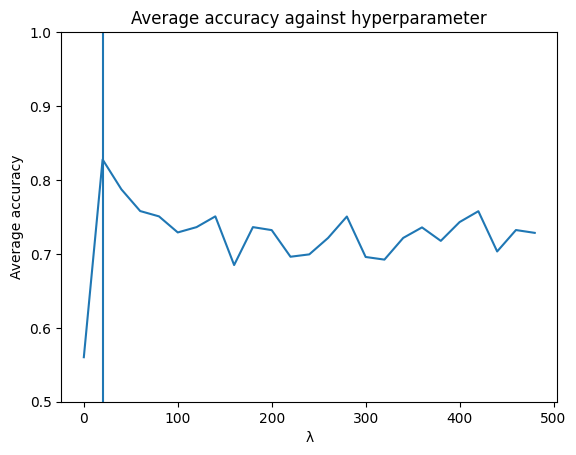

In [186]:
CVSVM = CrossValidationSVM(diabetes_X_trains_split_std, diabetes_X_vals_split_std, diabetes_train_y_split_relabel, diabetes_train_y_vals_relabel)
CVSVM.hyper_parameter_array_search(np.arange(0, 500, 20), 0.5, 1)

8.333333333333332

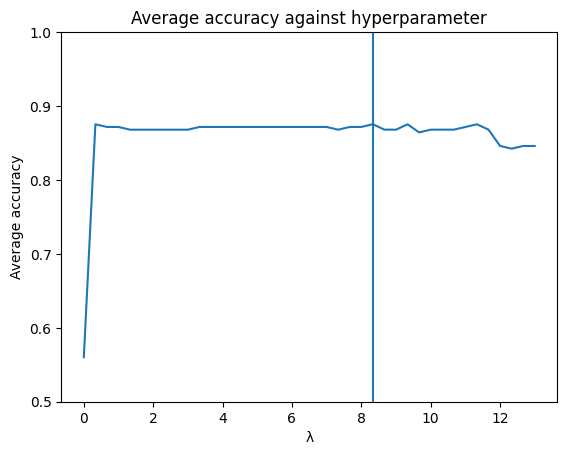

In [187]:
CVSVM.hyper_parameter_array_search(np.linspace(0, 13, 40), 0.5, 1)

#### Low hardness and high hardness

The hardness hyperparameter describes how much wrong predictions are penalised according to how far they are from the hyperplane. If the hardness is too low, wrong classifications would not be penalised much and the algorithm minimises $||w||$ instead, which is not helpful since the algorithm searches for a hyperplane with a larger margin without caring too much about misclassifications.

If hardness is too high, the algorithm tends to try to maximise the proportion of correct predictions without caring too much about the margin.

2.2.2

Find hyperplanes

In [189]:
diabetes_X_train_fold = diabetes_X_trains_split_std[0]
diabetes_y_train_fold = diabetes_train_y_split_relabel[0]

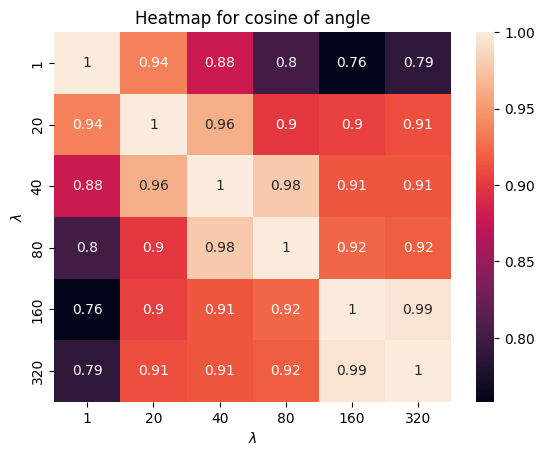

In [191]:
hyperparameter_arr = [1, 20, 40, 80, 160, 320]

def angle_svm(hyperparameter_arr):
    models = [SVM(a) for a in hyperparameter_arr]
    for m in models:
        m.train_model(diabetes_X_train_fold, diabetes_y_train_fold)
    # Each normal is a column of this matrix
    normals_svm = np.array([m.params[:-1] for m in models]).transpose()

    # standardise the vectors
    normals_cvm_std = normals_svm / np.linalg.norm(normals_svm, axis=0)
    # take the matrix of inner products of unit normals
    dot_product_mat = normals_cvm_std.transpose() @ normals_cvm_std

    sns.heatmap(dot_product_mat, annot=True)
    plt.xticks(0.5 + np.arange(len(hyperparameter_arr)),hyperparameter_arr)
    plt.yticks(0.5 + np.arange(len(hyperparameter_arr)),hyperparameter_arr)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$\lambda$")
    plt.title("Heatmap for cosine of angle")
angle_svm(hyperparameter_arr)

2.2.3

0.2631578947368421

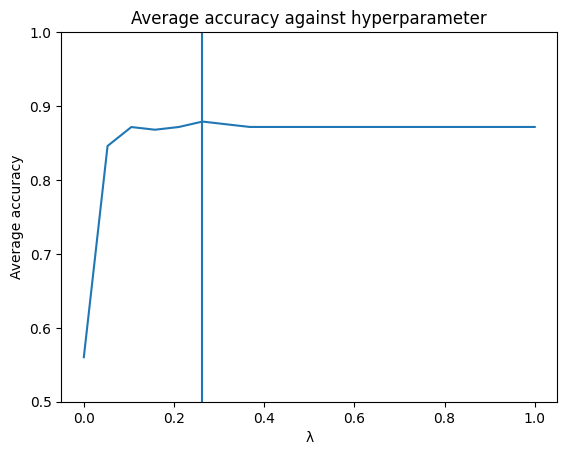

In [192]:
CVSVM.hyper_parameter_array_search(np.linspace(0, 1, 20), 0.5, 1)

Optimal hyperparameter:
$$
\lambda = 0.2631578947368421
$$

In [193]:
svm_optimal = SVM(0.2631578947368421)
svm_optimal.train_model(diabetes_train_X_std, diabetes_train_y_relabel)
svm_pred = svm_optimal.predict(diabetes_test_X_std)

svm_cm = confusion_matrix(svm_pred, diabetes_test_y_relabel, plot=False)
svm_acc, svm_prec, svm_f_sc = cm_measures(svm_cm)
print(f"Accuracy for SVM : {svm_acc}")
print(f"Precision for SVM : {svm_prec}")
print(f"F score for SVM : {svm_f_sc}")


Accuracy for SVM : 0.8547008547008547
Precision for SVM : 0.48
F score for SVM : 0.5853658536585366


||Accuracy|Precision| F score|
|---|---|---|---|
|Linear SVM | 0.85|0.48|0.59

Seems like it is doing worse than previous methods

2.2.4

Code from this section referenced from weekly notebooks

Function for the gram matrix

In [200]:
def gram(X1, X2, sigma):
    """
    Compute the Gram matrix
    """

    n1, m1 = X1.shape
    n2, m2 = X2.shape
    output = np.zeros(shape=(n1, n2))

    for i in range(n1):
        for j in range(n2):
            # Extract the row vectors
            X1i, X2j = X1[i], X2[j]

            # Populate i,j th entry
            output[i, j] = np.tanh(sigma * np.dot(X1i, X2j) + 1)
    return output

Implement cost function and gradient for kernelised SVM

Pack intercept together as a single vector
$$

   	  \mathbf{u}_b = 
   	  \begin{bmatrix}
	  
  	  	u_1 \\
  	  	\vdots \\
  	  	u_N \\
		b
  	  \end{bmatrix}
$$
We want to minimise
\begin{align*}
&L(\mathbf{u},b) \\
=& \frac{1}{2}\mathbf{u}^{\rm{T}}\mathbf{K} \mathbf{u} + \lambda \sum_{i=1}^N  \max \Big\{0, 1-y^{(i)}(\mathbf{K}^{(i)}\mathbf{u} + b)\Big\}
\end{align*}

So we find its gradient

\begin{align*}
&\nabla_{\mathbf{u}}(L(\mathbf{u},b)) \\
=& \mathbf{Ku}\ - \lambda \sum_{i=1}^N  y^{(i)}\mathbf{K}^{(i)} 1_{\{1-y^{(i)}(\mathbf{K}^{(i)}\mathbf{u} + b) > 0\}}
\end{align*}

\begin{align*}
&\frac{\partial L(\mathbf{u},b)}{\partial b} \\
=& - \lambda \sum_{i=1}^N y^{(i)}1_{\{1-y^{(i)}(\mathbf{K}^{(i)}\mathbf{u} + b) > 0\}}
\end{align*}

In [203]:
def kernel_cost(u_b, K, y, reg):
    """
    Return cost for kernelised SVM
    """
    u = u_b[:-1]
    b = u_b[-1]
    
    # Vector of distances
    dist = 1 - y * (K @ u + b)

    # max(0, dist)
    dist[dist < 0] = 0 
    # Hinge term
    hinge = reg * sum(dist)
    return u @ K @ u / 2 + hinge

In [204]:
def grad_ker_cost(u_b, K_batch, y_batch, reg):
    """
    Return gradient for cost of kernelised SVM
    """
    u = u_b[:-1]
    b = u_b[-1]

    # For SGD
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])
    
    distance = 1 - (y_batch * (K_batch @ u + b))

    # Contribution from first term.
    # Only consider gradient of u and not intercept now
    grad_u = np.zeros(len(u))
    grad_u += K_batch @ u

    for ind, d in enumerate(distance):
        # Add contribution from second term
        if max(0, d) > 0:
            grad_u -= (reg * y_batch[ind] * K_batch[ind])

    # Consider grad of intercept
    grad = np.append(grad_u, 0)

    for ind, d in enumerate(distance):
        if max(0, d)!= 0:
            grad[-1] -= reg * y_batch[ind]

    return grad/len(y_batch)

Implement SGD (referenced from weekly notebook)

In [205]:
def sgd_kernel(K, y, batch_size=32, burnin=100, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=1e3, print_outcome=False):

    # initialise starting position and cost
    u_b = np.ones(K.shape[1] + 1) / 100    
    nth = 0
    prev_cost = np.inf
    
    # SGD
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        np.random.shuffle(indices)

        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        # For each iterm, find contribution to gradient
        # Note that the gradient for intercept is absorbed inside u_b
        for ki, yi in zip(K_b, y_b):
            ascent = grad_ker_cost(u_b, ki, yi, regul_strength) 
            u_b = u_b - (learning_rate * ascent)
        
        # convergence check on 2^n'th iteration
        if (iteration==2**nth or iteration==max_iterations - 1):
            # compute cost
            cost = kernel_cost(u_b, K, y, regul_strength)
            if print_outcome and iteration > 2000:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion. Ensures the algorithm runs at least burnin times.
            if abs(prev_cost - cost) < stop_criterion * prev_cost and iteration > burnin:
                if print_outcome:
                    print("Iteration is: {}, Cost is: {}".format(iteration, cost))
                return u_b
            
            prev_cost = cost
            nth += 1
    return u_b

Make the KernelSVM model class

In [220]:
class KernelSVM(Model):
    # loss_func = staticmethod(kernel_cost)
    # grad_loss_func = staticmethod(grad_ker_cost)

    def train_model(self, X_train, y_train, print_outcome=False, learning_rate=4e-5):
        self.X_train = X_train
        self.sigma, self.reg = self.hparams
        K = gram(X_train, X_train, self.sigma)

        # loss_wrapper = staticmethod(lambda b : self.loss_func(b, K, y_train,self.reg))
        # grad_wrapper = staticmethod(lambda b : self.grad_loss_func(b, K, y_train, self.reg))
        self.params = sgd_kernel(K, y_train, batch_size=90, max_iterations=10000, burnin=2000, stop_criterion=0.01, learning_rate=learning_rate, regul_strength=10, print_outcome=print_outcome)

    def predict(self, X_input):
        # Define kernel with test and train data
        K = gram(X_input, self.X_train, self.sigma)

        # self.params is u_b
        u = self.params[:-1]
        b = self.params[-1]
        return np.sign(K @ u + b)

    def evaluate_model(self, y_true, X_input, metric="accuracy"):
        predicted = self.predict(X_input)
        if metric == "accuracy":
            return sum(predicted == y_true) / len(y_true)

Train the model for $\sigma=0.01, 0.1, 1, 2$

In [222]:
lambda_hparam = 10
sigma_arr = [0.01, 0.1, 1, 2]
learning_rates = [8e-5, 8e-5, 4e-5, 4e-5]

kernel_svm_models = [KernelSVM((sigma, lambda_hparam)) for sigma in sigma_arr]
for i, m in enumerate(kernel_svm_models):
    m.train_model(diabetes_train_X_std, diabetes_train_y_relabel)

    print(f"\nIntercept for sigma={sigma_arr[i]} is b={m.params[-1]}\n")


Intercept for sigma=0.01 is b=-1.0591999999999486


Intercept for sigma=0.1 is b=-1.5527999999998943


Intercept for sigma=1 is b=-1.8379999999998629


Intercept for sigma=2 is b=-1.6871999999998795



|$\sigma$|Intercept|
|---|---|
|0.01|-1.06|
|0.1|-1.55|
|1|-1.84|
|2|-1.69|

2.2.5

Make predictions on test set

In [225]:
predicted_arr_ker_svm  = [m.predict(diabetes_test_X_std) for m in kernel_svm_models]
ker_cm_arr = [confusion_matrix(pred, diabetes_test_y_relabel, [1, -1], plot=False) for pred in predicted_arr_ker_svm]

In [228]:
for ind, sigma in enumerate(sigma_arr):
    acc, prec, f_sc = cm_measures(ker_cm_arr[ind])
    print(f"Accuracy in test set for sigma={sigma_arr[ind]} : {acc}")
    print(f"Precision in test set for sigma={sigma_arr[ind]} : {prec}")
    print(f"F score in test set for sigma={sigma_arr[ind]} : {f_sc}")
    print("\n")

Accuracy in test set for sigma=0.01 : 0.8632478632478633
Precision in test set for sigma=0.01 : nan
F score in test set for sigma=0.01 : nan


Accuracy in test set for sigma=0.1 : 0.9230769230769231
Precision in test set for sigma=0.1 : 0.7692307692307693
F score in test set for sigma=0.1 : 0.6896551724137931


Accuracy in test set for sigma=1 : 0.8547008547008547
Precision in test set for sigma=1 : 0.47368421052631576
F score in test set for sigma=1 : 0.5142857142857142


Accuracy in test set for sigma=2 : 0.8717948717948718
Precision in test set for sigma=2 : 0.5238095238095238
F score in test set for sigma=2 : 0.5945945945945946




C:\Users\Prog\AppData\Local\Temp\ipykernel_11860\3277820968.py:35: RuntimeWarning: invalid value encountered in scalar divide
  return TP / (TP + FP)


We note that the precision and F score for $\sigma=0.01$ cannot be computed. This might be because no positive predictions were made.

#### Comparison with linear SVM
The following table summarises the performance on the test set

||Accuracy|Precision| F score|
|---|---|---|---|
|Kernelised SVM ($\sigma=0.01$)|0.86 |N/A| N/A|
|Kernelised SVM ($\sigma=0.1$)|0.92 |0.77| 0.69|
|Kernelised SVM ($\sigma=1$)|0.85 |0.47| 0.51|
|Kernelised SVM ($\sigma=2$)|0.87 |0.52| 0.59|
|Linear SVM | 0.85|0.48|0.59|

<br>

|  | Accuracy |Precision |F score|
| --- | --- | --- |---|
|Test (unweighted RF)| 0.92 | 0.82| 0.67|
|Test (weighted RF)| 0.92 | 0.68| 0.74|

There is a noticeable variation in performance within the kernelised SVMs. $\sigma=0.1$ seems to give the best performance.  It is the only kernelised SVM which outperforms the linear SVM noticeably and is comparable to random forests. 

<br>

Since one kernelised SVM gave noticeably better performance than Linear SVM, we might say that a linear decision boundary may not be suitable for this dataset. 

<br>

For further hyperparameter optimisation, we can try to vary $\sigma$ around $0.1$ while keeping $\lambda$ fixed. Alternatively, we can explore different $\sigma, \lambda$ pairs